# ***Development and Deployment of AI for Mental Health and Life cycle Habits Recommendation System***

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Datatime library for Date columns
from datetime import datetime
import datetime as dt

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# For build pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor


# for plot decision tree
from sklearn import tree

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor
from xgboost import XGBRegressor

# Metrics libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/lifestyle_habits.csv")

In [3]:
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage,Happiness_Score
0,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No,5
1,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No,7
2,6,34,Non-binary,Healthcare,Australia,No,High,No,Low,5.1,74,4,3.6,Unhealthy,Regular Smoker,Social Drinker,Yes,5
3,7,24,Non-binary,Engineering,India,Yes,Medium,Yes,High,7.1,35,4,6.0,Average,Non-Smoker,Non-Drinker,Yes,7
4,9,53,Male,Other,USA,No,Low,No,Low,4.8,62,3,5.7,Unhealthy,Occasional Smoker,Regular Drinker,Yes,5


In [4]:
# Dataset Rows & Columns count
df.shape

(24998, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  24998 non-null  int64  
 1   Age                      24998 non-null  int64  
 2   Gender                   24998 non-null  object 
 3   Occupation               24998 non-null  object 
 4   Country                  24998 non-null  object 
 5   Mental_Health_Condition  24998 non-null  object 
 6   Severity                 24998 non-null  object 
 7   Consultation_History     24998 non-null  object 
 8   Stress_Level             24998 non-null  object 
 9   Sleep_Hours              24998 non-null  float64
 10  Work_Hours               24998 non-null  int64  
 11  Physical_Activity_Hours  24998 non-null  int64  
 12  Social_Media_Usage       24998 non-null  float64
 13  Diet_Quality             24998 non-null  object 
 14  Smoking_Habit         

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Occupation,0
Country,0
Mental_Health_Condition,0
Severity,0
Consultation_History,0
Stress_Level,0
Sleep_Hours,0


In [8]:
# Dataset Columns
df.columns

Index(['User_ID', 'Age', 'Gender', 'Occupation', 'Country',
       'Mental_Health_Condition', 'Severity', 'Consultation_History',
       'Stress_Level', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours',
       'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit',
       'Alcohol_Consumption', 'Medication_Usage', 'Happiness_Score'],
      dtype='object')

In [9]:
# Dataset Describe
df.describe(include='all')

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage,Happiness_Score
count,24998.000000,24998.000000,24998,24998,24998,24998,24998,24998,24998,24998.000000,24998.000000,24998.000000,24998.000000,24998,24998,24998,24998,24998.000000
unique,NaN,NaN,4,7,7,2,3,2,3,NaN,NaN,NaN,NaN,3,4,4,2,NaN
top,NaN,NaN,Female,Finance,India,Yes,Medium,No,Medium,NaN,NaN,NaN,NaN,Average,Heavy Smoker,Heavy Drinker,No,NaN
freq,NaN,NaN,6414,3643,3753,12503,8436,12504,8466,NaN,NaN,NaN,NaN,8472,6342,6320,12532,NaN
mean,25109.395792,41.472718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.018721,55.127650,5.011961,3.258065,NaN,NaN,NaN,NaN,5.865149
std,14435.387779,13.886295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.732755,14.648357,3.160148,1.594494,NaN,NaN,NaN,NaN,1.474109
min,2.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,30.000000,0.000000,0.500000,NaN,NaN,NaN,NaN,0.000000
25%,12579.250000,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000,42.000000,2.000000,1.900000,NaN,NaN,NaN,NaN,5.000000
50%,25218.500000,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,55.000000,5.000000,3.300000,NaN,NaN,NaN,NaN,6.000000
75%,37595.250000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.500000,68.000000,8.000000,4.600000,NaN,NaN,NaN,NaN,7.000000


In [10]:
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage,Happiness_Score
0,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No,5
1,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No,7
2,6,34,Non-binary,Healthcare,Australia,No,High,No,Low,5.1,74,4,3.6,Unhealthy,Regular Smoker,Social Drinker,Yes,5
3,7,24,Non-binary,Engineering,India,Yes,Medium,Yes,High,7.1,35,4,6.0,Average,Non-Smoker,Non-Drinker,Yes,7
4,9,53,Male,Other,USA,No,Low,No,Low,4.8,62,3,5.7,Unhealthy,Occasional Smoker,Regular Drinker,Yes,5


In [11]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'The unique values in {i} are {df[i].nunique()}')

The unique values in User_ID are 24998
The unique values in Age are 48
The unique values in Gender are 4
The unique values in Occupation are 7
The unique values in Country are 7
The unique values in Mental_Health_Condition are 2
The unique values in Severity are 3
The unique values in Consultation_History are 2
The unique values in Stress_Level are 3
The unique values in Sleep_Hours are 61
The unique values in Work_Hours are 51
The unique values in Physical_Activity_Hours are 11
The unique values in Social_Media_Usage are 56
The unique values in Diet_Quality are 3
The unique values in Smoking_Habit are 4
The unique values in Alcohol_Consumption are 4
The unique values in Medication_Usage are 2
The unique values in Happiness_Score are 11


In [12]:
columns_to_analyze = [
    'Gender',
    'Occupation',
    'Country',
    'Mental_Health_Condition',
    'Severity',
    'Consultation_History',
    'Stress_Level',
    'Diet_Quality',
    'Smoking_Habit',
    'Alcohol_Consumption',
    'Medication_Usage'
]

# Loop through the list and print the value counts for each column
for col in columns_to_analyze:
    print(f"--- Counts of each {col} type ---")
    print(df[col].value_counts())
    print("\n")

--- Counts of each Gender type ---
Gender
Female               6414
Male                 6253
Prefer not to say    6241
Non-binary           6090
Name: count, dtype: int64


--- Counts of each Occupation type ---
Occupation
Finance        3643
Engineering    3624
IT             3614
Healthcare     3574
Other          3568
Education      3522
Sales          3453
Name: count, dtype: int64


--- Counts of each Country type ---
Country
India        3753
Canada       3642
USA          3630
Other        3595
UK           3492
Germany      3451
Australia    3435
Name: count, dtype: int64


--- Counts of each Mental_Health_Condition type ---
Mental_Health_Condition
Yes    12503
No     12495
Name: count, dtype: int64


--- Counts of each Severity type ---
Severity
Medium    8436
High      8301
Low       8261
Name: count, dtype: int64


--- Counts of each Consultation_History type ---
Consultation_History
No     12504
Yes    12494
Name: count, dtype: int64


--- Counts of each Stress_Level type 

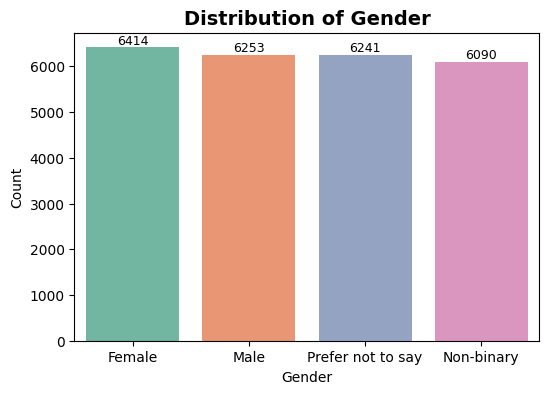

In [13]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Gender', palette="Set2", order=df['Gender'].value_counts().index)
plt.title("Distribution of Gender", fontsize=14, weight="bold")
plt.xlabel("Gender"); plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0,5),
                textcoords='offset points')
plt.show()


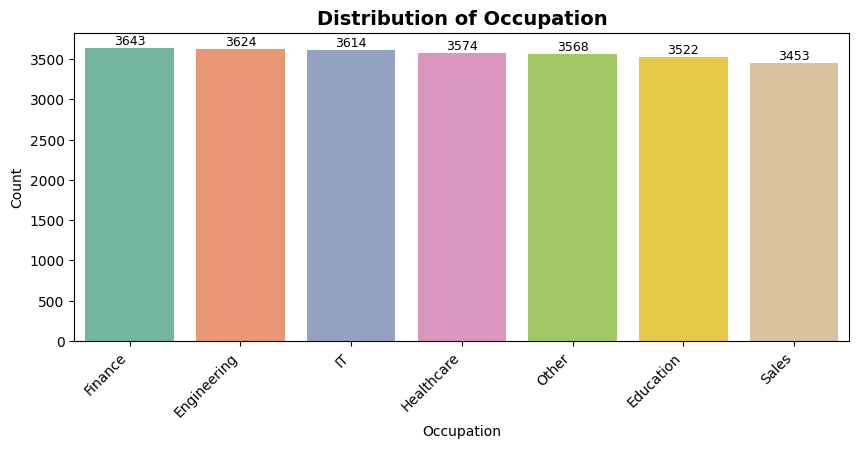

In [14]:
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df, x='Occupation', palette="Set2", order=df['Occupation'].value_counts().index)
plt.title("Distribution of Occupation", fontsize=14, weight="bold")
plt.xlabel("Occupation"); plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0,5),
                textcoords='offset points')
plt.show()


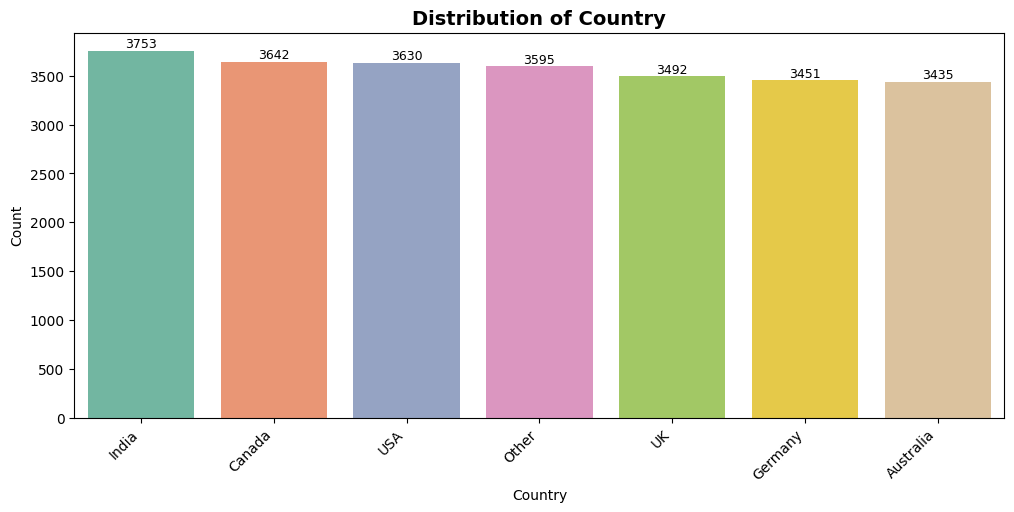

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=df, x='Country', palette="Set2", order=df['Country'].value_counts().index)
plt.title("Distribution of Country", fontsize=14, weight="bold")
plt.xlabel("Country"); plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0,5),
                textcoords='offset points')
plt.show()


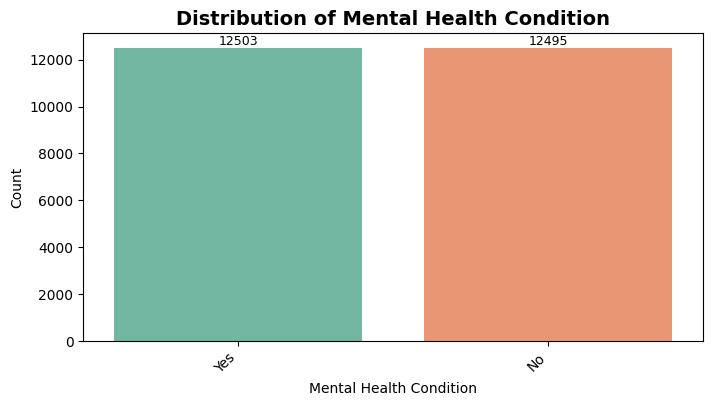

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x='Mental_Health_Condition', palette="Set2", order=df['Mental_Health_Condition'].value_counts().index)
plt.title("Distribution of Mental Health Condition", fontsize=14, weight="bold")
plt.xlabel("Mental Health Condition"); plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0,5),
                textcoords='offset points')
plt.show()


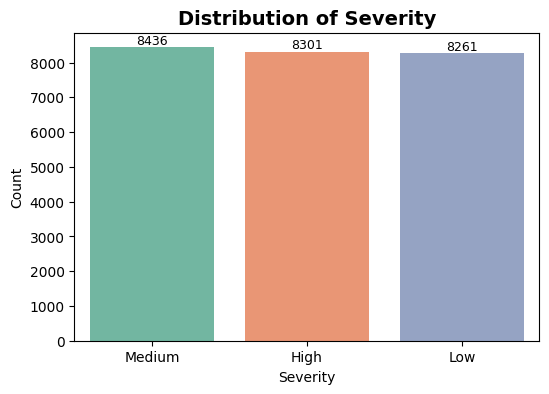

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Severity', palette="Set2", order=df['Severity'].value_counts().index)
plt.title("Distribution of Severity", fontsize=14, weight="bold")
plt.xlabel("Severity"); plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black',
                xytext=(0,5), textcoords='offset points')
plt.show()


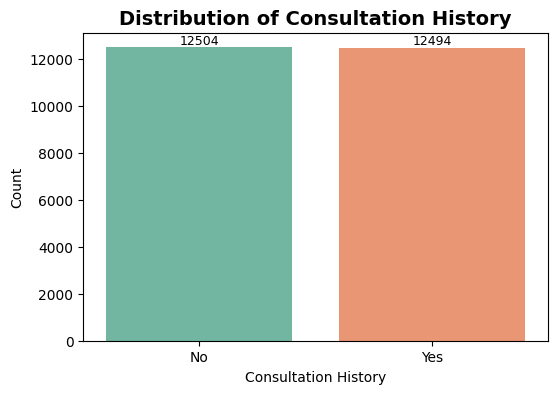

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Consultation_History', palette="Set2", order=df['Consultation_History'].value_counts().index)
plt.title("Distribution of Consultation History", fontsize=14, weight="bold")
plt.xlabel("Consultation History"); plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black',
                xytext=(0,5), textcoords='offset points')
plt.show()


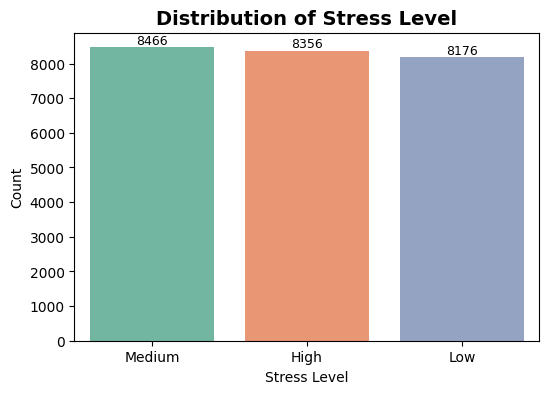

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Stress_Level', palette="Set2", order=df['Stress_Level'].value_counts().index)
plt.title("Distribution of Stress Level", fontsize=14, weight="bold")
plt.xlabel("Stress Level"); plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black',
                xytext=(0,5), textcoords='offset points')
plt.show()


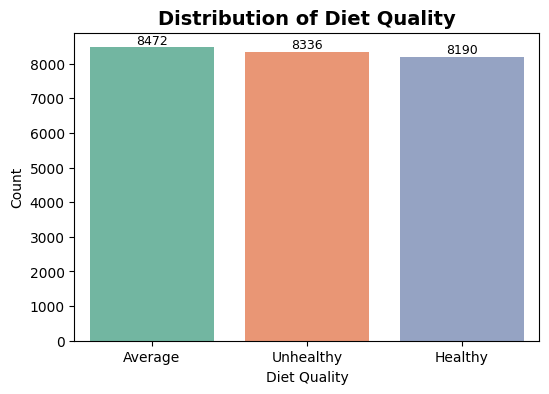

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Diet_Quality', palette="Set2", order=df['Diet_Quality'].value_counts().index)
plt.title("Distribution of Diet Quality", fontsize=14, weight="bold")
plt.xlabel("Diet Quality"); plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black',
                xytext=(0,5), textcoords='offset points')
plt.show()


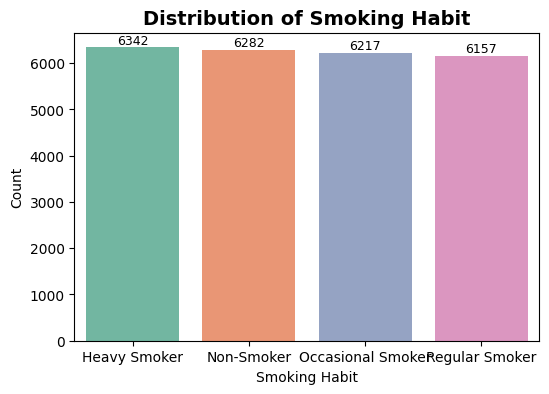

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Smoking_Habit', palette="Set2", order=df['Smoking_Habit'].value_counts().index)
plt.title("Distribution of Smoking Habit", fontsize=14, weight="bold")
plt.xlabel("Smoking Habit"); plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black',
                xytext=(0,5), textcoords='offset points')
plt.show()


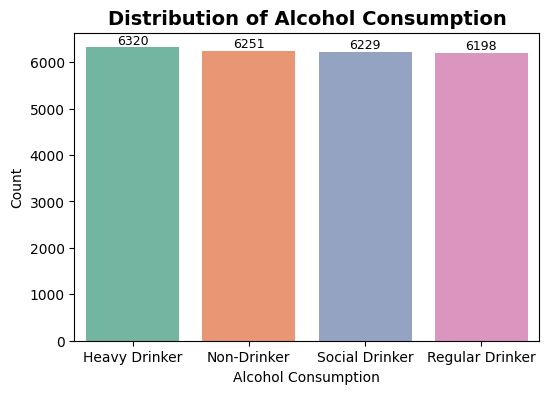

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Alcohol_Consumption', palette="Set2", order=df['Alcohol_Consumption'].value_counts().index)
plt.title("Distribution of Alcohol Consumption", fontsize=14, weight="bold")
plt.xlabel("Alcohol Consumption"); plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black',
                xytext=(0,5), textcoords='offset points')
plt.show()


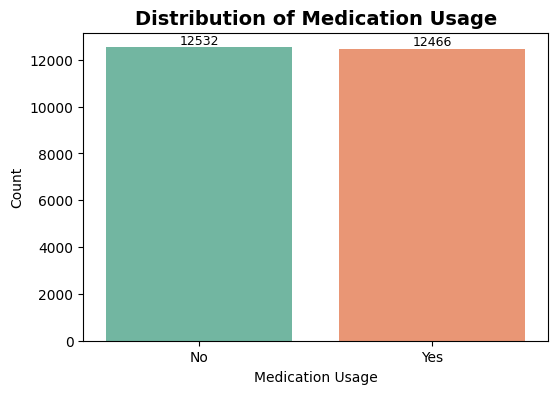

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Medication_Usage', palette="Set2", order=df['Medication_Usage'].value_counts().index)
plt.title("Distribution of Medication Usage", fontsize=14, weight="bold")
plt.xlabel("Medication Usage"); plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black',
                xytext=(0,5), textcoords='offset points')
plt.show()


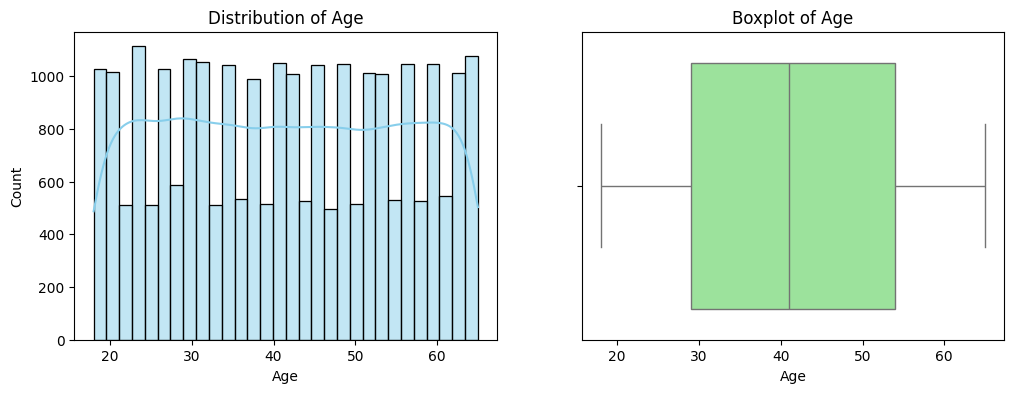

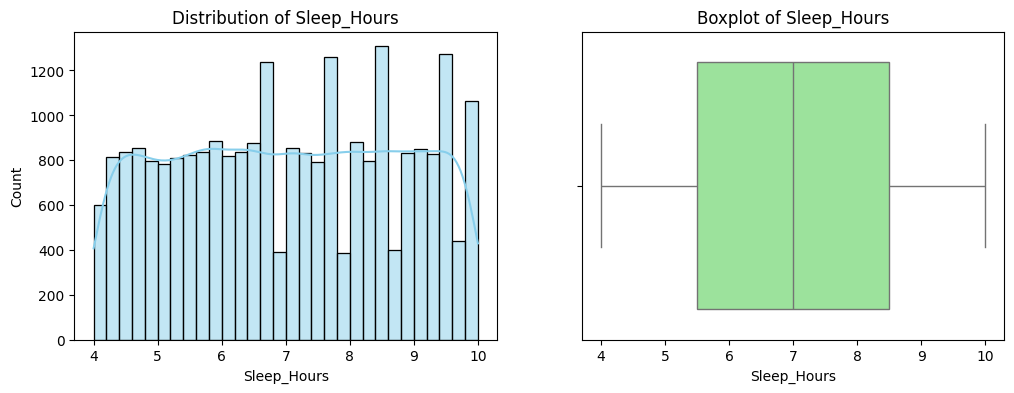

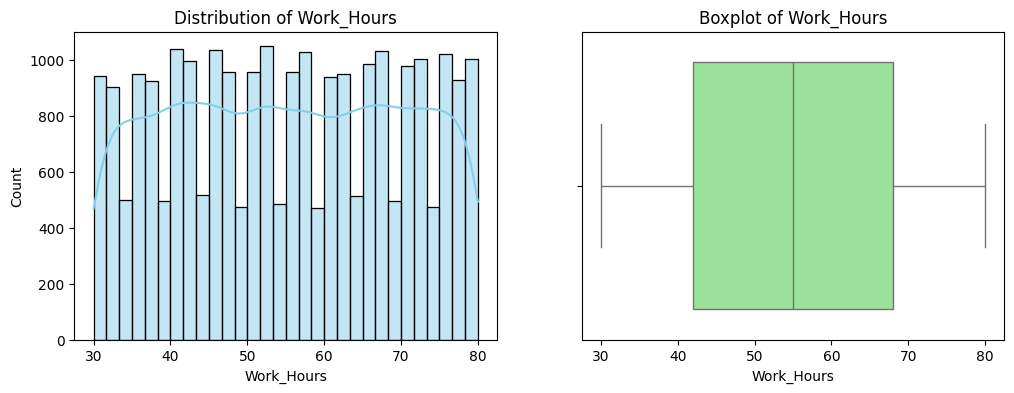

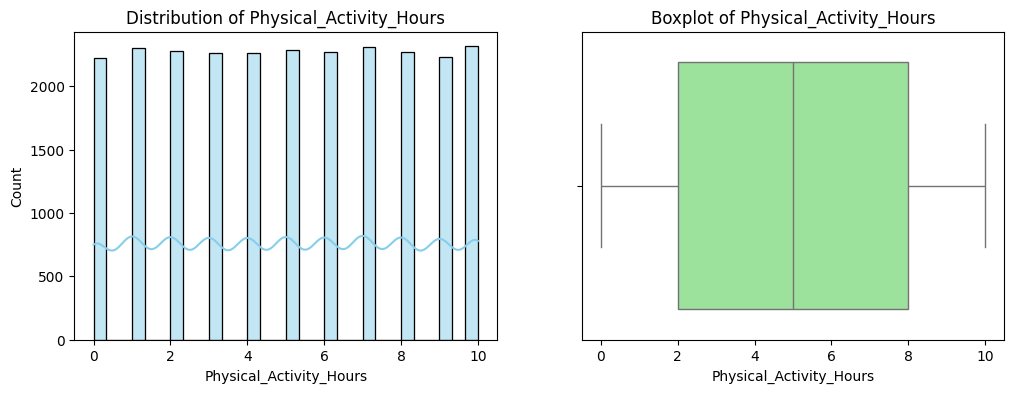

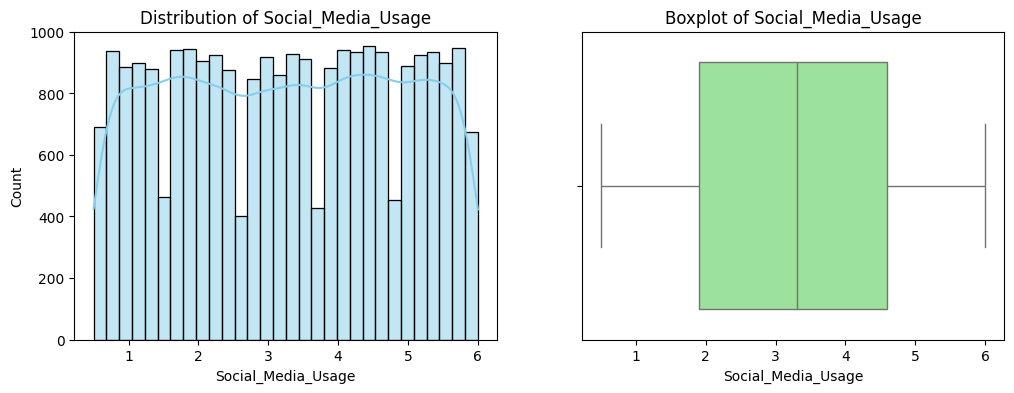

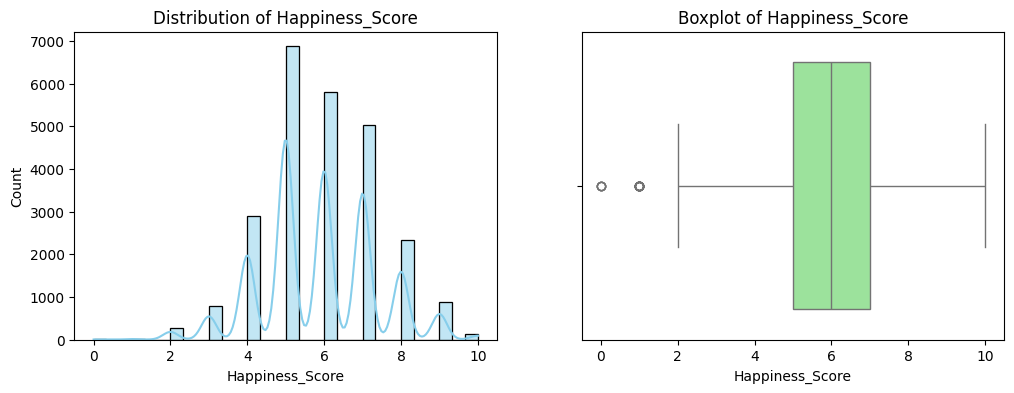

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age','Sleep_Hours','Work_Hours','Physical_Activity_Hours','Social_Media_Usage','Happiness_Score']

for col in numerical_cols:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")

    plt.show()


In [15]:

# 1. Ordinal Encoding for ordered categorical columns
severity_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
diet_mapping = {'Unhealthy': 1, 'Average': 2, 'Healthy': 3}

df['Severity'] = df['Severity'].map(severity_mapping)
df['Stress_Level'] = df['Stress_Level'].map(stress_mapping)
df['Diet_Quality'] = df['Diet_Quality'].map(diet_mapping)

# 2. One-Hot Encoding for nominal and binary columns
nominal_cols = ['Gender', 'Occupation', 'Country', 'Smoking_Habit', 'Alcohol_Consumption']
binary_cols = ['Mental_Health_Condition', 'Consultation_History', 'Medication_Usage']

# Use pd.get_dummies() for all nominal and binary columns
df_encoded = pd.get_dummies(df, columns=nominal_cols + binary_cols, drop_first=True, dtype=int)

print("--- After All Encodings ---")
print(df_encoded.head())

print("\n--- Final Data Types Check ---")
print(df_encoded.info())

--- After All Encodings ---
   User_ID  Age  Severity  Stress_Level  Sleep_Hours  Work_Hours  \
0        2   48         1             1          6.8          74   
1        4   30         2             1          6.9          57   
2        6   34         3             1          5.1          74   
3        7   24         2             3          7.1          35   
4        9   53         1             1          4.8          62   

   Physical_Activity_Hours  Social_Media_Usage  Diet_Quality  Happiness_Score  \
0                        2                 3.4             1                5   
1                        4                 5.4             2                7   
2                        4                 3.6             1                5   
3                        4                 6.0             2                7   
4                        3                 5.7             1                5   

   ...  Country_USA  Smoking_Habit_Non-Smoker  \
0  ...            0        

In [16]:
df_encoded.head()

,User_ID,Age,Severity,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Happiness_Score,...,Country_USA,Smoking_Habit_Non-Smoker,Smoking_Habit_Occasional Smoker,Smoking_Habit_Regular Smoker,Alcohol_Consumption_Non-Drinker,Alcohol_Consumption_Regular Drinker,Alcohol_Consumption_Social Drinker,Mental_Health_Condition_Yes,Consultation_History_Yes,Medication_Usage_Yes
0,2,48,1,1,6.8,74,2,3.4,1,5,...,0,0,0,0,0,0,1,0,0,0
1,4,30,2,1,6.9,57,4,5.4,2,7,...,0,0,0,1,0,1,0,0,0,0
2,6,34,3,1,5.1,74,4,3.6,1,5,...,0,0,0,1,0,0,1,0,0,1
3,7,24,2,3,7.1,35,4,6.0,2,7,...,0,1,0,0,1,0,0,1,1,1
4,9,53,1,1,4.8,62,3,5.7,1,5,...,1,0,1,0,0,1,0,0,0,1


In [17]:

from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis for numerical columns
numerical_cols = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage', 'Happiness_Score']
print("\n--- Skewness and Kurtosis of Key Numerical Features ---")
for col in numerical_cols:
    print(f"{col:<25} - Skewness: {skew(df_encoded[col]):.2f}, Kurtosis: {kurtosis(df_encoded[col]):.2f}")


--- Skewness and Kurtosis of Key Numerical Features ---
Age                       - Skewness: 0.01, Kurtosis: -1.21
Sleep_Hours               - Skewness: -0.01, Kurtosis: -1.20
Work_Hours                - Skewness: -0.00, Kurtosis: -1.20
Physical_Activity_Hours   - Skewness: -0.00, Kurtosis: -1.22
Social_Media_Usage        - Skewness: -0.01, Kurtosis: -1.21
Happiness_Score           - Skewness: 0.08, Kurtosis: -0.07


Outlier counts before handling: {'Age': 0, 'Severity': 0, 'Stress_Level': 0, 'Sleep_Hours': 0, 'Work_Hours': 0, 'Physical_Activity_Hours': 0, 'Social_Media_Usage': 0, 'Diet_Quality': 0, 'Happiness_Score': 22}


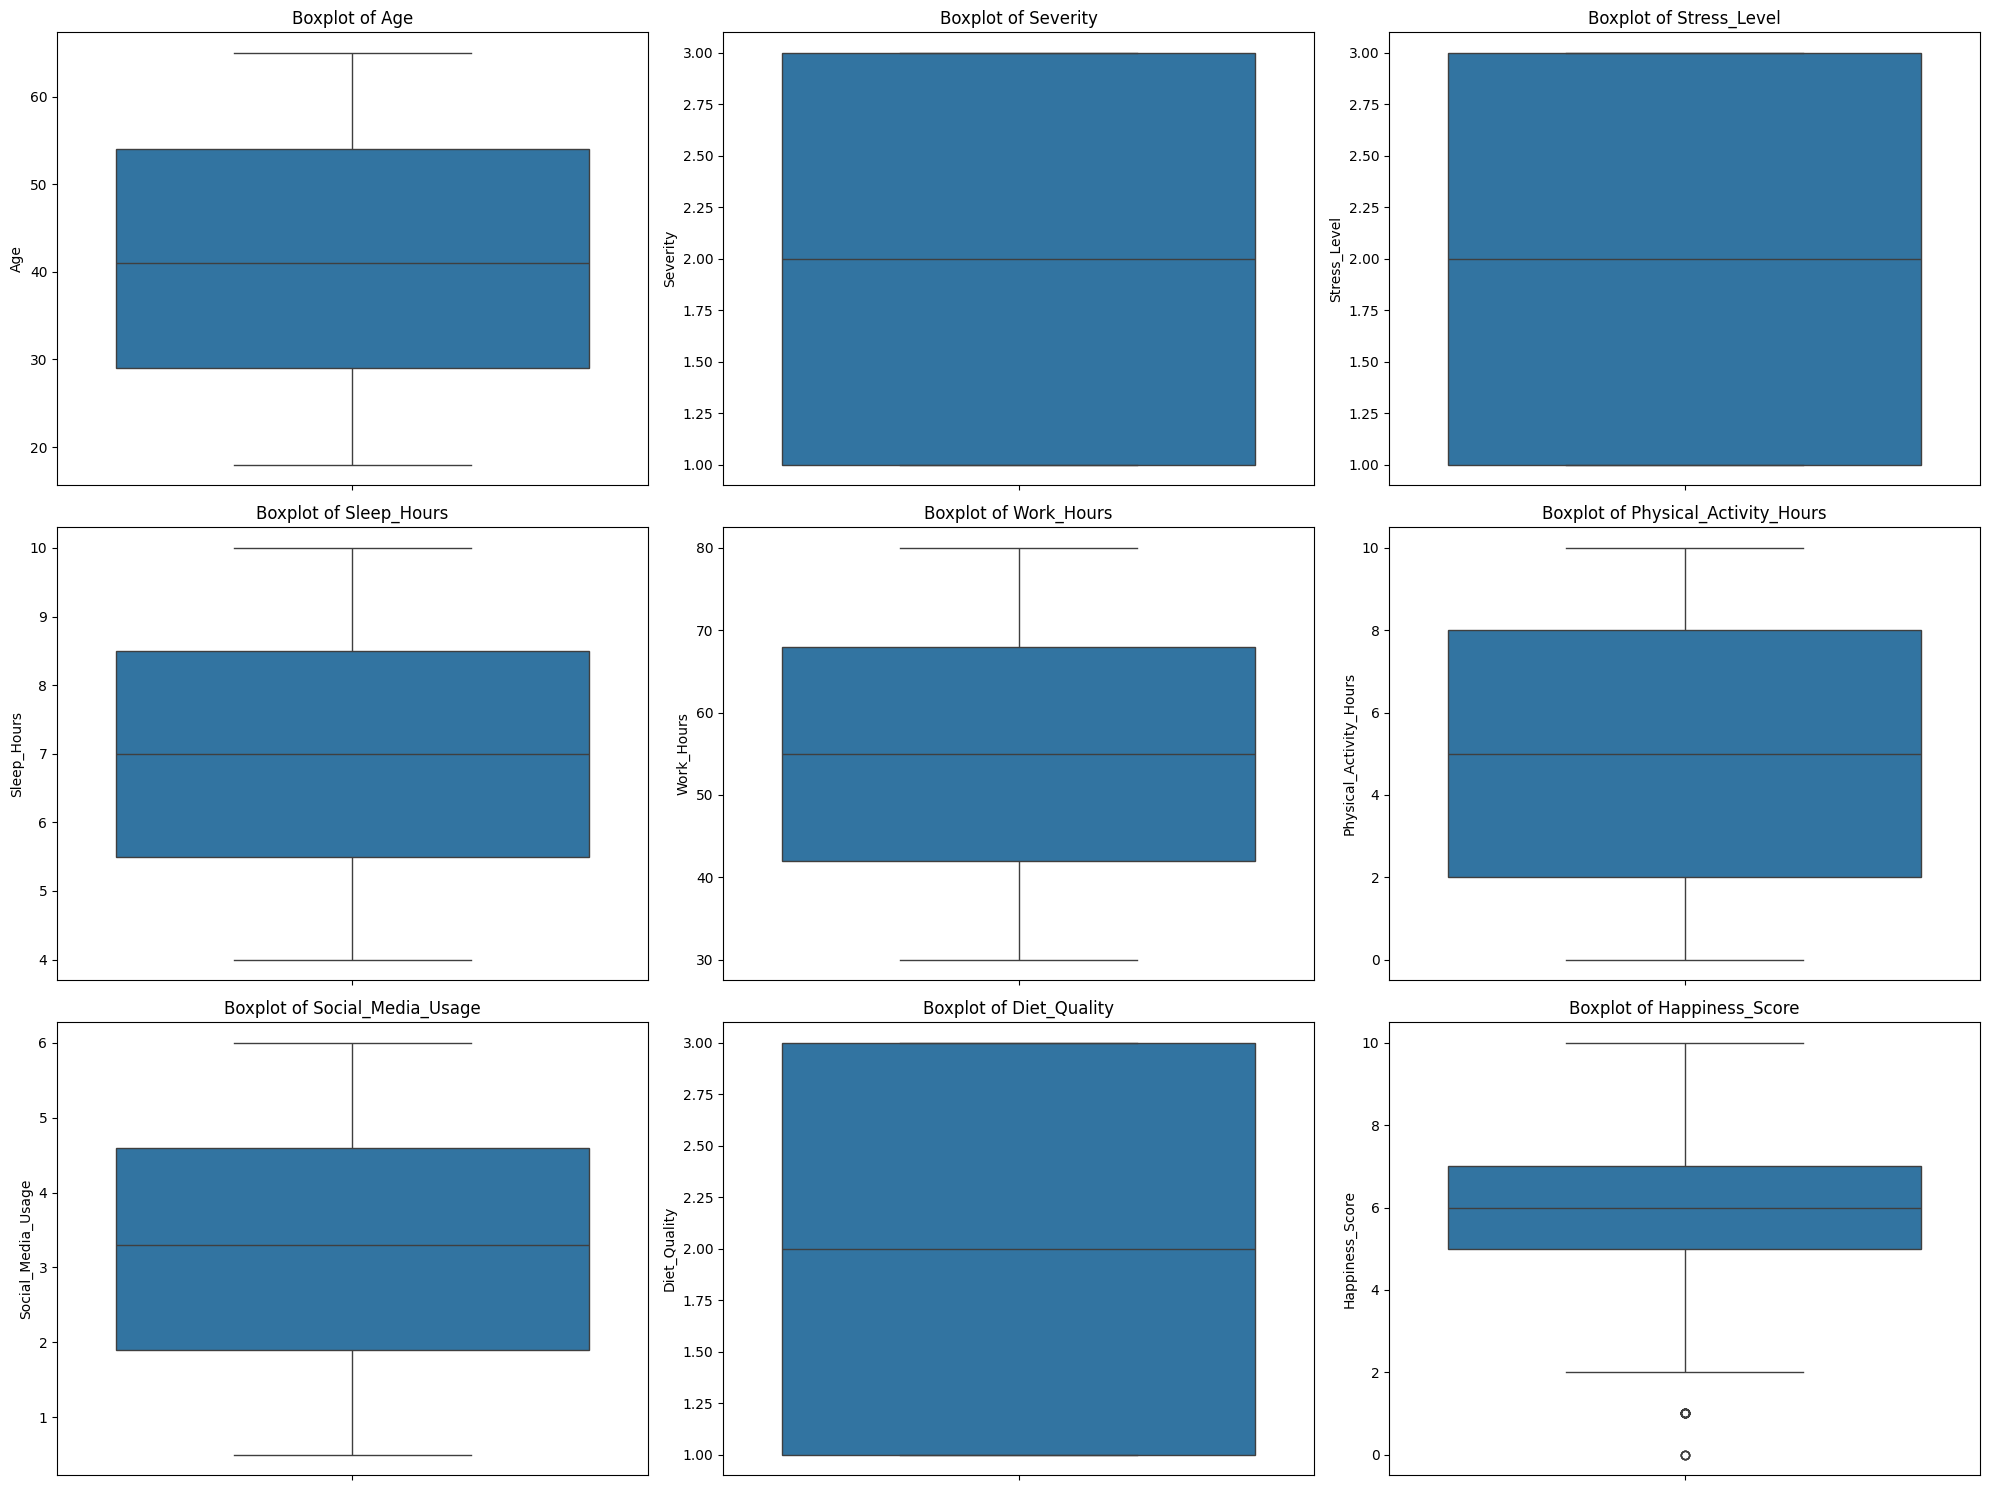

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Age', 'Severity', 'Stress_Level', 'Sleep_Hours', 'Work_Hours',
            'Physical_Activity_Hours', 'Social_Media_Usage', 'Diet_Quality', 'Happiness_Score']

# Function to count outliers using IQR
def count_outliers(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Count outliers before handling
outlier_counts = count_outliers(df_encoded, num_cols)
print("Outlier counts before handling:", outlier_counts)

# Boxplots to visualize
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


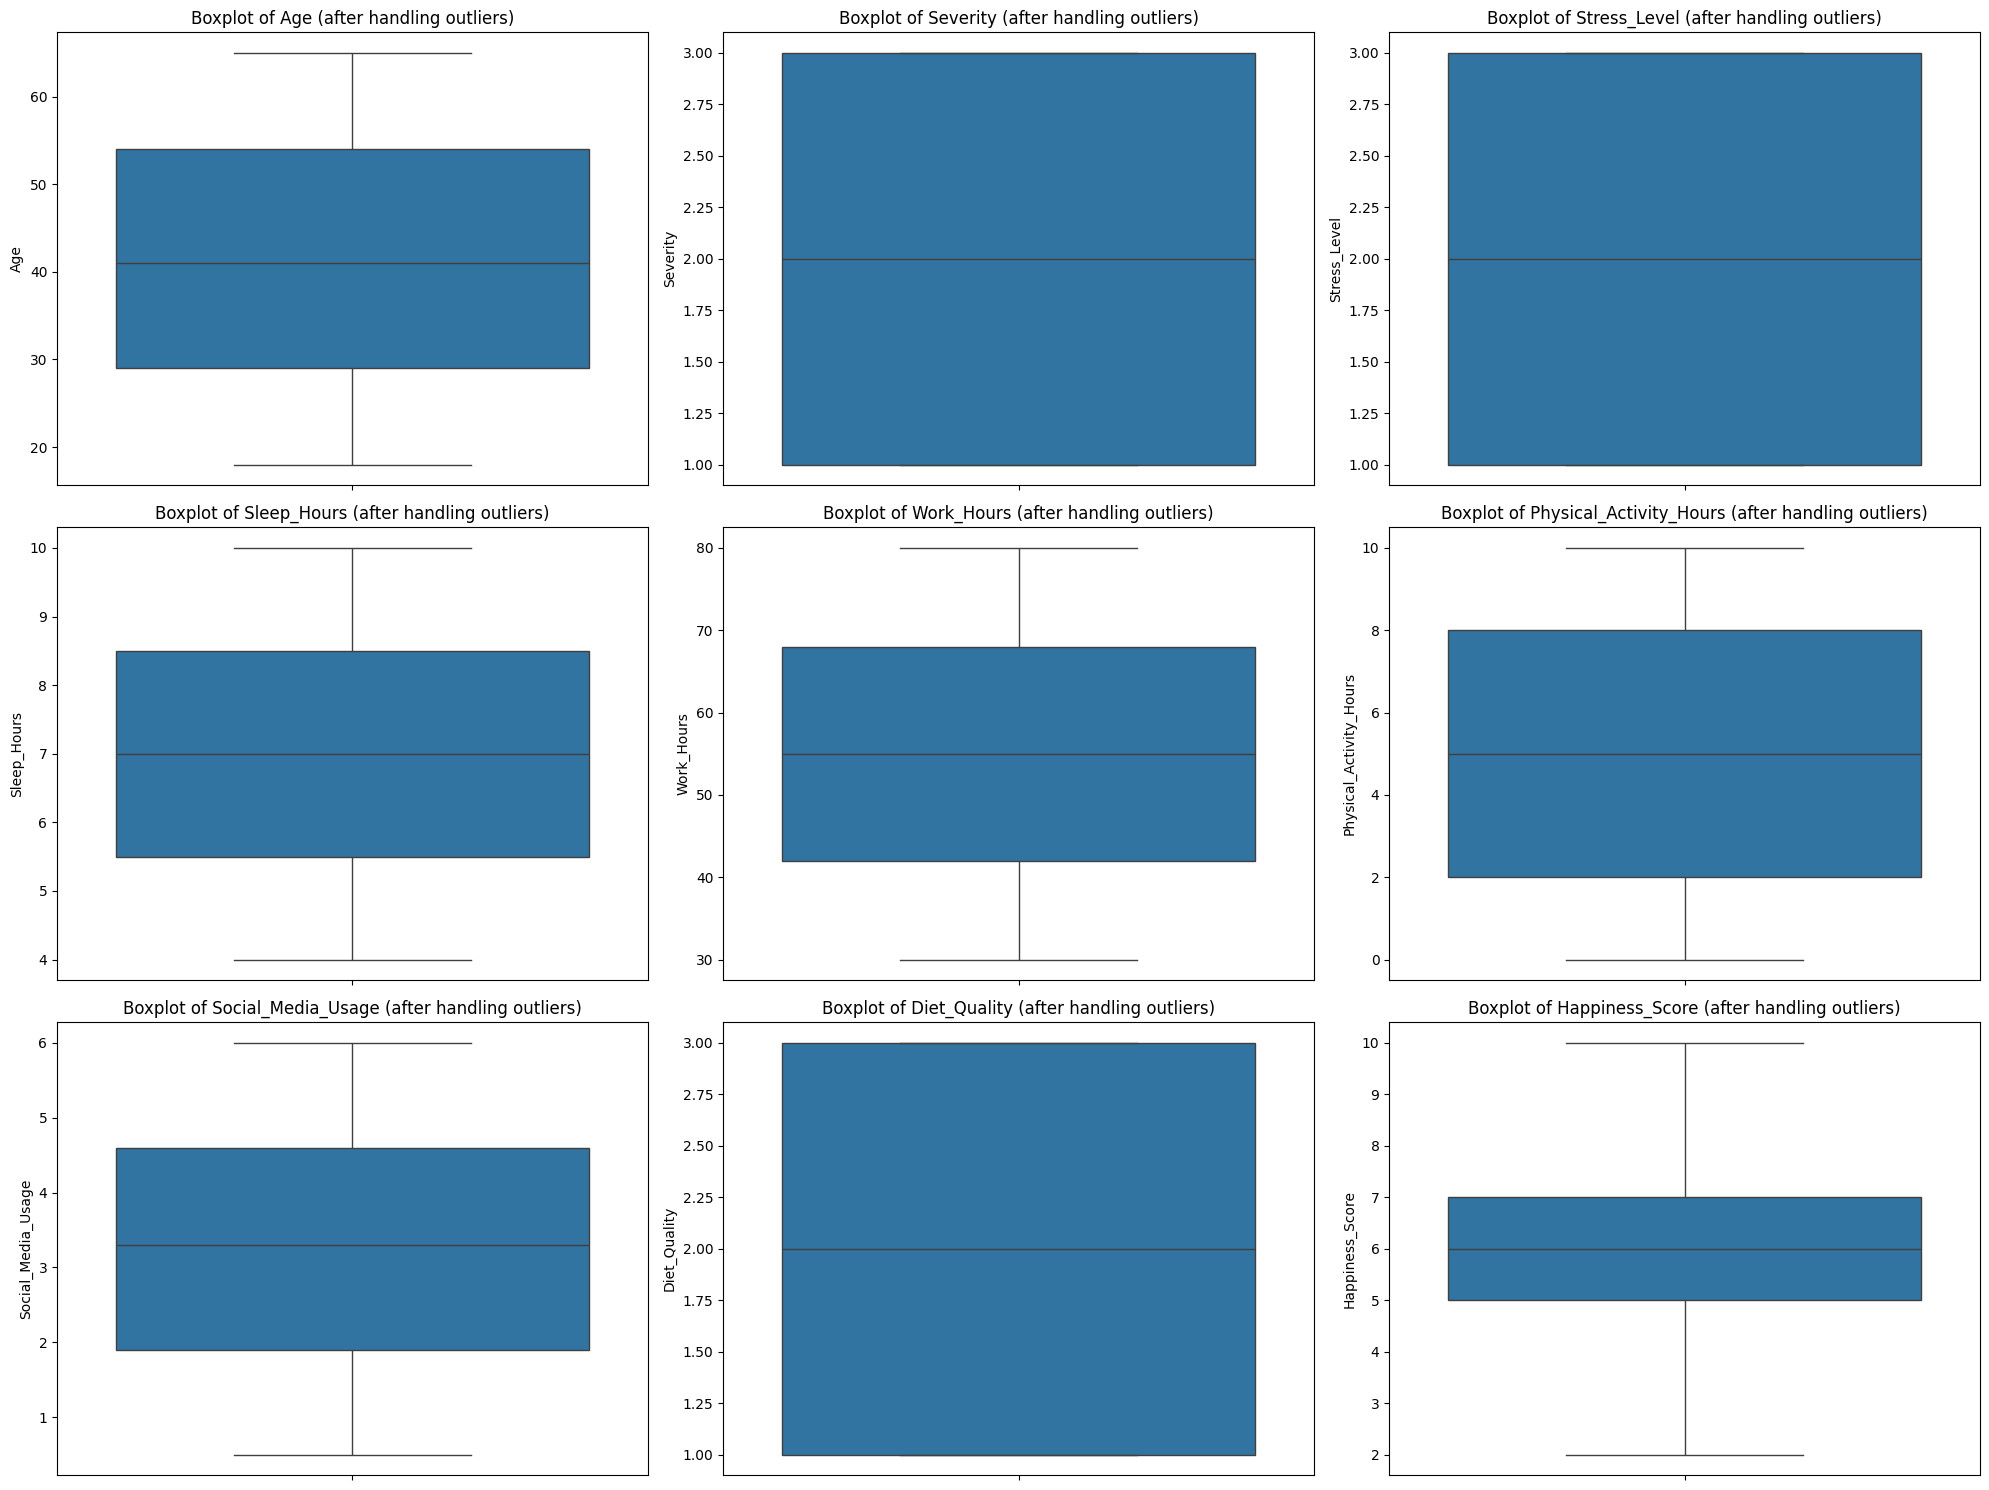

                Age      Severity  Stress_Level   Sleep_Hours    Work_Hours  \
count  24998.000000  24998.000000  24998.000000  24998.000000  24998.000000   
mean      41.472718      2.001600      2.007201      7.018721     55.127650   
std       13.886295      0.813976      0.813208      1.732755     14.648357   
min       18.000000      1.000000      1.000000      4.000000     30.000000   
25%       29.000000      1.000000      1.000000      5.500000     42.000000   
50%       41.000000      2.000000      2.000000      7.000000     55.000000   
75%       54.000000      3.000000      3.000000      8.500000     68.000000   
max       65.000000      3.000000      3.000000     10.000000     80.000000   

       Physical_Activity_Hours  Social_Media_Usage  Diet_Quality  \
count             24998.000000        24998.000000  24998.000000   
mean                  5.011961            3.258065      1.994160   
std                   3.160148            1.594494      0.813071   
min             

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Important numerical columns
num_cols = ['Age', 'Severity', 'Stress_Level', 'Sleep_Hours', 'Work_Hours',
            'Physical_Activity_Hours', 'Social_Media_Usage', 'Diet_Quality', 'Happiness_Score']

# Function to cap outliers using IQR
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

# Handle outliers
df_encoded = cap_outliers_iqr(df_encoded, num_cols)

# Boxplots after handling outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Boxplot of {col} (after handling outliers)')
plt.tight_layout()
plt.show()

# Verify info and describe
print(df_encoded[num_cols].describe())


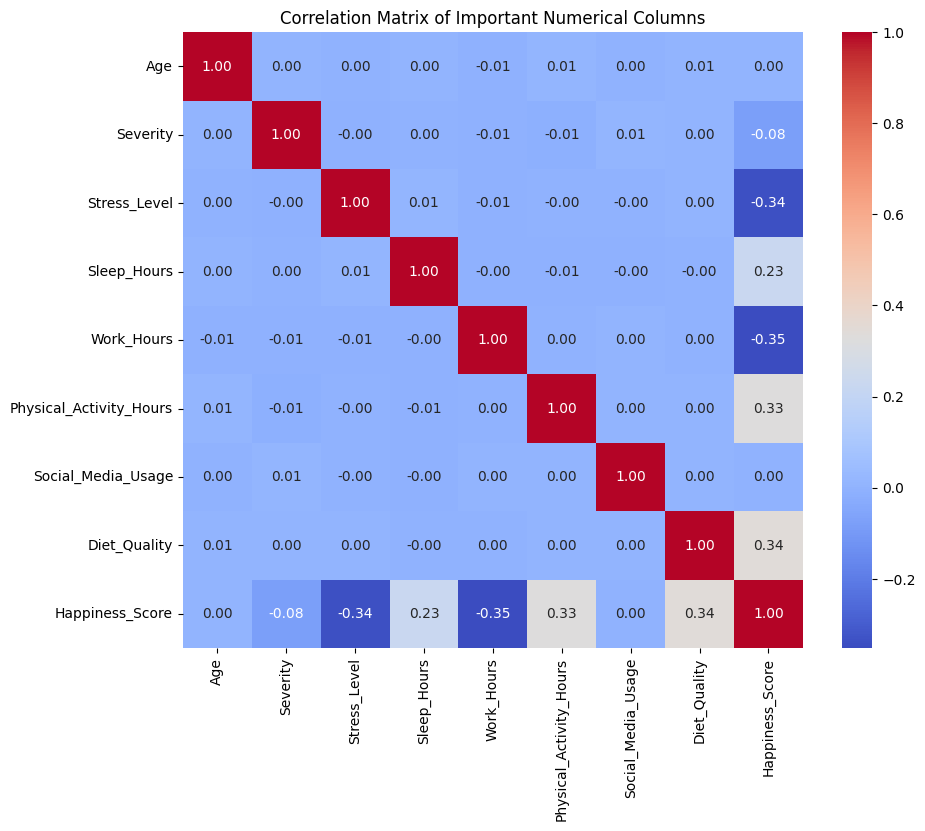

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only important numerical columns for correlation
num_cols = ['Age', 'Severity', 'Stress_Level', 'Sleep_Hours', 'Work_Hours',
            'Physical_Activity_Hours', 'Social_Media_Usage', 'Diet_Quality', 'Happiness_Score']

# Compute correlation matrix
corr_matrix = df_encoded[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Important Numerical Columns")
plt.show()


In [21]:
df_encoded = df_encoded.drop(columns=['User_ID'])

In [ ]:

# Separate features (X) and target variable (y)
''''X = df_encoded.drop(columns=['Happiness_Score'])
y = df_encoded['Happiness_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns for scaling
numerical_cols = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']
categorical_cols = [col for col in X_train.columns if col not in numerical_cols]

# Create a preprocessor to scale only the numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'  # Keep categorical columns as they are
)

# List of models to train
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Loop through each model to train and evaluate
for name, model in models.items():
    print(f"\n--- Training and Evaluating {name} ---")

    # Create a full pipeline for the model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = model_pipeline.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Perform Cross-Validation for a more robust evaluation
    cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='r2', n_jobs=-1)

    print(f"Cross-Validation R² Scores: {cv_scores.round(4)}")
    print(f"Average Cross-Validation R²: {cv_scores.mean():.4f}")

    print("-" * 30)'''

'\'X = df_encoded.drop(columns=[\'Happiness_Score\'])\ny = df_encoded[\'Happiness_Score\']\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Identify numerical columns for scaling\nnumerical_cols = [\'Age\', \'Sleep_Hours\', \'Work_Hours\', \'Physical_Activity_Hours\', \'Social_Media_Usage\']\ncategorical_cols = [col for col in X_train.columns if col not in numerical_cols]\n\n# Create a preprocessor to scale only the numerical columns\npreprocessor = ColumnTransformer(\n    transformers=[\n        (\'num\', StandardScaler(), numerical_cols)\n    ],\n    remainder=\'passthrough\'  # Keep categorical columns as they are\n)\n\n# List of models to train\nmodels = {\n    \'Linear Regression\': LinearRegression(),\n    \'Random Forest\': RandomForestRegressor(random_state=42),\n    \'XGBoost\': XGBRegressor(random_state=42)\n}\n\n# Loop through each model to train and evaluate\nfor name, model in

In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  24998 non-null  int64  
 1   Severity                             24998 non-null  int64  
 2   Stress_Level                         24998 non-null  int64  
 3   Sleep_Hours                          24998 non-null  float64
 4   Work_Hours                           24998 non-null  int64  
 5   Physical_Activity_Hours              24998 non-null  int64  
 6   Social_Media_Usage                   24998 non-null  float64
 7   Diet_Quality                         24998 non-null  int64  
 8   Happiness_Score                      24998 non-null  float64
 9   Gender_Male                          24998 non-null  int64  
 10  Gender_Non-binary                    24998 non-null  int64  
 11  Gender_Prefer not to say    

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# ------------------------------
# Step 1: Separate features (X) and target (y)
X = df_encoded.drop(columns=['Happiness_Score'])
y = df_encoded['Happiness_Score']

# Step 2: Split into training & testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Identify numerical & categorical columns
numerical_cols = ['Age', 'Sleep_Hours', 'Work_Hours',
                  'Physical_Activity_Hours', 'Social_Media_Usage']
categorical_cols = [col for col in X_train.columns if col not in numerical_cols]

# Step 4: Preprocessing (scale numerical features only)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'  # keep categorical columns unchanged
)

# ------------------------------
# Step 5: Linear Regression
step2 = LinearRegression()

# Build pipeline
pipe1 = Pipeline([
    ('step1', preprocessor),
    ('step2', step2)
])

# Step 6: Fit pipeline
pipe1.fit(X_train, y_train)

# Step 7: Predictions
y_pred_train = pipe1.predict(X_train)
y_pred_test = pipe1.predict(X_test)
# display pipeline diagram
display(pipe1)

# Step 8: Model Performance
print("\033[1mTraining Data R² and Adjusted R²\033[0m")
print("R²:", r2_score(y_train, y_pred_train))
adj_r2_train = 1 - (1 - r2_score(y_train, y_pred_train)) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
print("Adjusted R²:", adj_r2_train)

print("\n\033[1mTesting Data R² and Adjusted R²\033[0m")
print("R²:", r2_score(y_test, y_pred_test))
adj_r2_test = 1 - (1 - r2_score(y_test, y_pred_test)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print("Adjusted R²:", adj_r2_test)

print("\n\033[1mPerformance Metrics\033[0m")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Step 9: Cross-validation for robustness
cv_scores = cross_val_score(pipe1, X, y, cv=5, scoring='r2', n_jobs=-1)
print("\n\033[1mCross-Validation Results\033[0m")
print("R² Scores:", cv_scores.round(4))
print("Average R²:", cv_scores.mean().round(4))


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Sleep_Hours',
                                                   'Work_Hours',
                                                   'Physical_Activity_Hours',
                                                   'Social_Media_Usage'])])),
                ('step2', LinearRegression())])

Training Data R² and Adjusted R²
R²: 0.8465181638349106
Adjusted R²: 0.8462721623945257

Testing Data R² and Adjusted R²
R²: 0.843848813759871
Adjusted R²: 0.842842806520152

Performance Metrics
MAE: 0.4681100376472532
MSE: 0.33747721663103036
RMSE: 0.5809278927982632

Cross-Validation Results
R² Scores: [0.8398 0.8473 0.8422 0.8492 0.8492]
Average R²: 0.8455


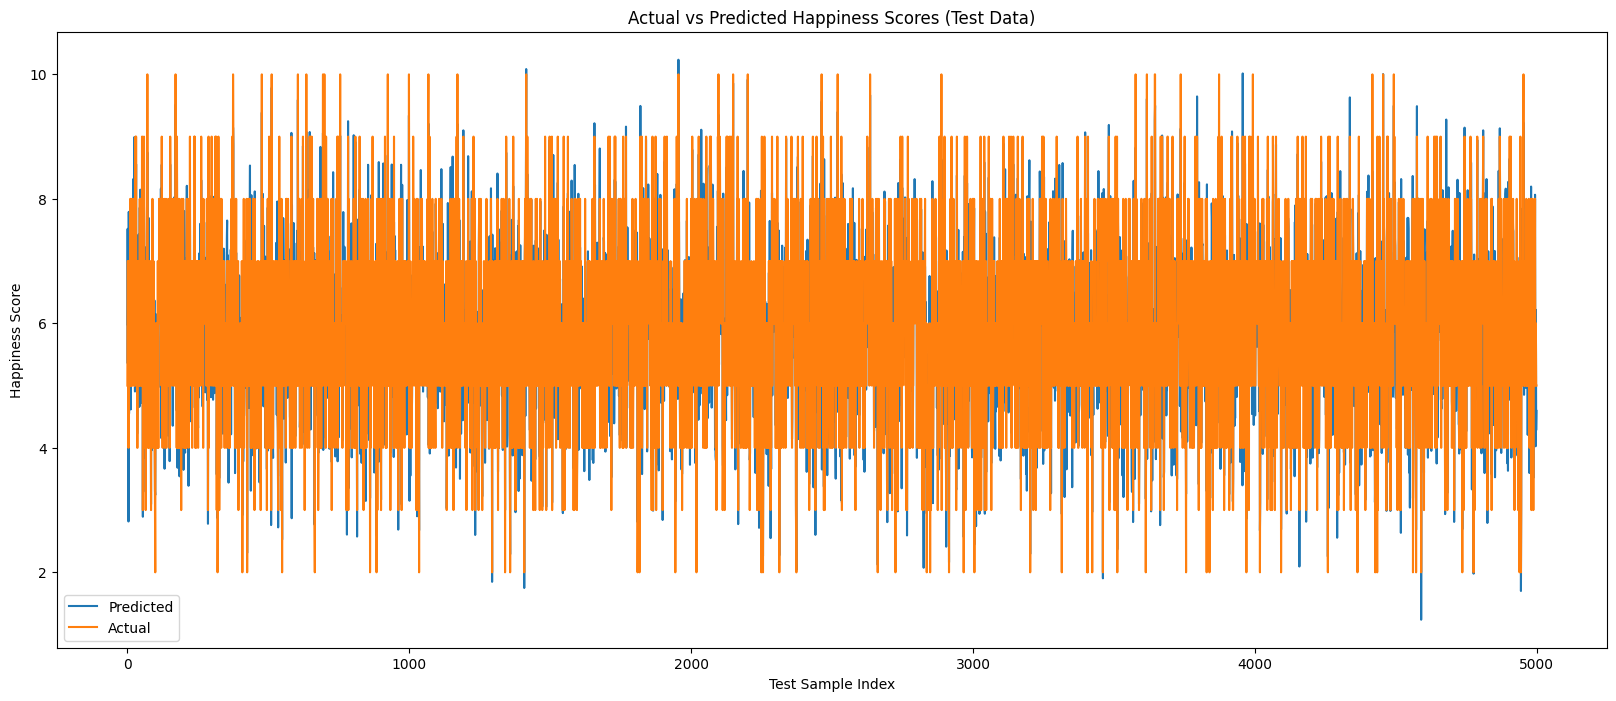

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(y_pred_test, label="Predicted")
plt.plot(np.array(y_test), label="Actual")
plt.legend()
plt.xlabel("Test Sample Index")
plt.ylabel("Happiness Score")
plt.title("Actual vs Predicted Happiness Scores (Test Data)")
plt.show()


In [ ]:
# ------------------- Ridge Regression -------------------
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,3,5,8,12,15,18,21,25]}
step2 = GridSearchCV(Ridge(), parameters, cv=10)

pipe2 = Pipeline([
    ('step1', preprocessor),
    ('step2', step2)
])

pipe2.fit(X_train, y_train)

y_pred_train = pipe2.predict(X_train)
y_pred_test = pipe2.predict(X_test)

display(pipe2)

print("\033[1mTraining Data R² and Adjusted R²\033[0m")
print("R²:", r2_score(y_train, y_pred_train))
print("Adjusted R²:", 1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

print("\n\033[1mTesting Data R² and Adjusted R²\033[0m")
print("R²:", r2_score(y_test, y_pred_test))
print("Adjusted R²:", 1-(1-r2_score(y_test,y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

print("\nBest Params:", step2.best_params_)
print("CV Best Score:", step2.best_score_)

print("\n\033[1mPerformance Metrics\033[0m")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Sleep_Hours',
                                                   'Work_Hours',
                                                   'Physical_Activity_Hours',
                                                   'Social_Media_Usage'])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Ridge(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    3, 5, 8, 12, 15, 18, 21,
                                                    25]}))])

Training Data R² and Adjusted R²
R²: 0.8465180572634068
Adjusted R²: 0.8462720556522086

Testing Data R² and Adjusted R²
R²: 0.8438458774395459
Adjusted R²: 0.8428398512825226

Best Params: {'alpha': 1}
CV Best Score: 0.8456896276792738

Performance Metrics
MAE: 0.468110290883404
MSE: 0.3374835626680624
RMSE: 0.5809333547560016


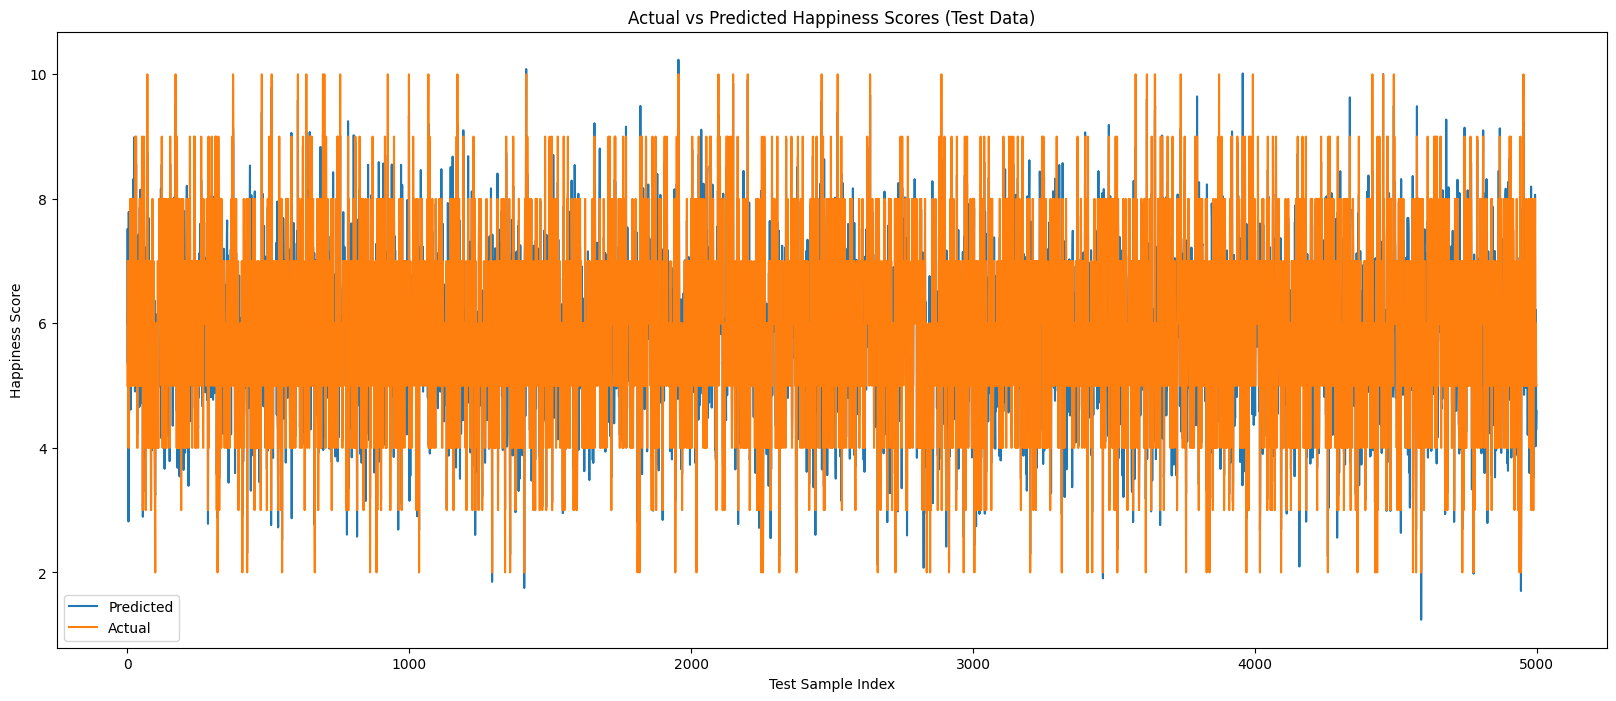

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(y_pred_test, label="Predicted")
plt.plot(np.array(y_test), label="Actual")
plt.legend()
plt.xlabel("Test Sample Index")
plt.ylabel("Happiness Score")
plt.title("Actual vs Predicted Happiness Scores (Test Data)")
plt.show()


In [ ]:
# ------------------- Lasso Regression -------------------
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,8,12,15,18,21,25]}
step2 = GridSearchCV(Lasso(), parameters, cv=10)

pipe3 = Pipeline([
    ('step1', preprocessor),
    ('step2', step2)
])

pipe3.fit(X_train, y_train)

y_pred_train = pipe3.predict(X_train)
y_pred_test = pipe3.predict(X_test)

display(pipe3)

print("\033[1mTraining Data R² and Adjusted R²\033[0m")
print("R²:", r2_score(y_train, y_pred_train))
print("Adjusted R²:", 1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

print("\n\033[1mTesting Data R² and Adjusted R²\033[0m")
print("R²:", r2_score(y_test, y_pred_test))
print("Adjusted R²:", 1-(1-r2_score(y_test,y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

print("\nBest Params:", step2.best_params_)
print("CV Best Score:", step2.best_score_)

print("\n\033[1mPerformance Metrics\033[0m")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Sleep_Hours',
                                                   'Work_Hours',
                                                   'Physical_Activity_Hours',
                                                   'Social_Media_Usage'])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Lasso(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    2, 3, 4, 5, 8, 12, 15, 18,
                                                    21, 25]}))])

Training Data R² and Adjusted R²
R²: 0.8464277035857968
Adjusted R²: 0.8461815571552807

Testing Data R² and Adjusted R²
R²: 0.8439051569050254
Adjusted R²: 0.8428995126571819

Best Params: {'alpha': 0.001}
CV Best Score: 0.8457520442821224

Performance Metrics
MAE: 0.4679161709620208
MSE: 0.33735544664477035
RMSE: 0.5808230768872483


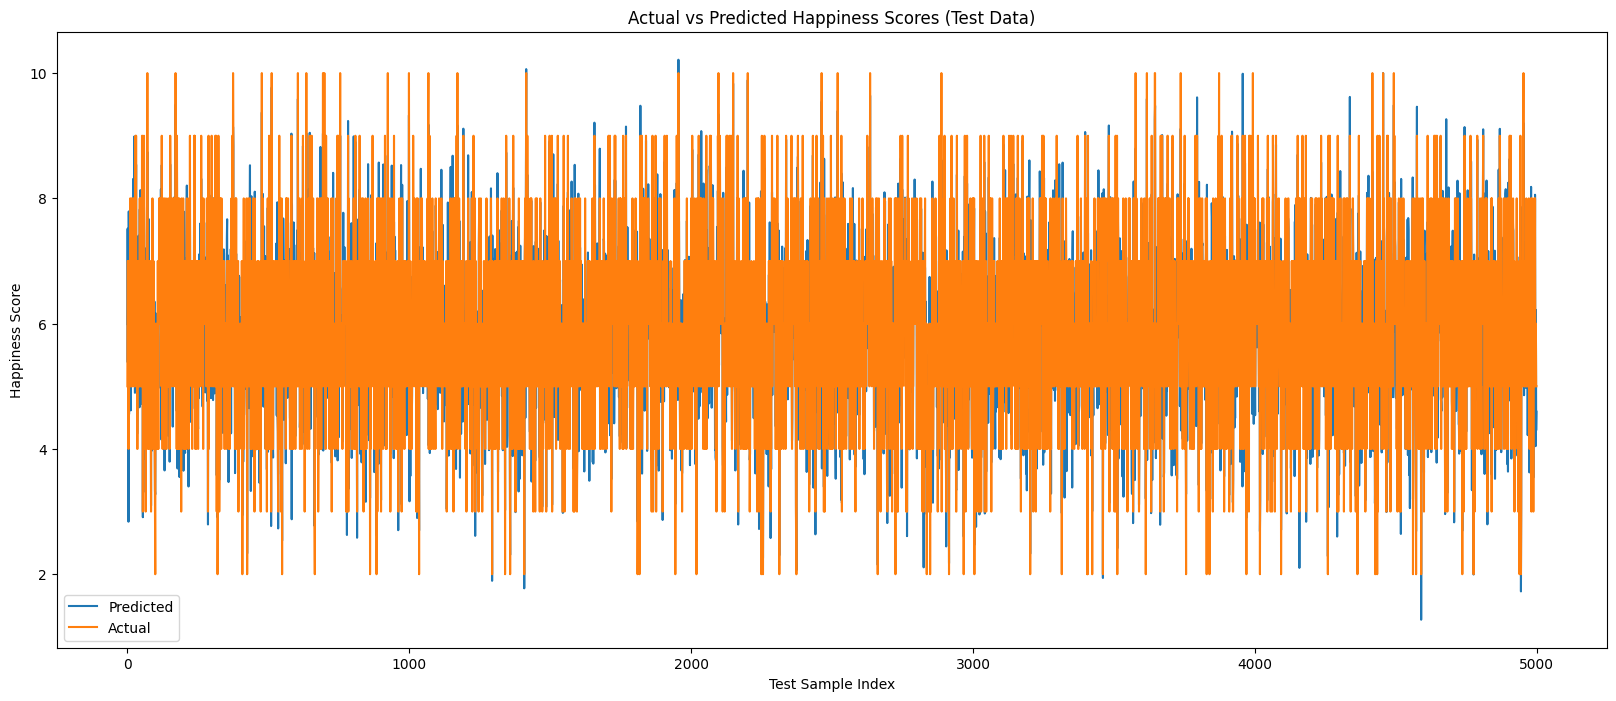

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(y_pred_test, label="Predicted")
plt.plot(np.array(y_test), label="Actual")
plt.legend()
plt.xlabel("Test Sample Index")
plt.ylabel("Happiness Score")
plt.title("Actual vs Predicted Happiness Scores (Test Data)")
plt.show()


In [ ]:
# ------------------- Decision Tree Regressor -------------------
parameters = {
    'criterion':['squared_error'],
    'splitter':['best'],
    'max_depth':[6],
    'max_features':[1.0]
}
step2 = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters, cv=10, n_jobs=-1)

pipe4 = Pipeline([
    ('step1', preprocessor),
    ('step2', step2)
])

pipe4.fit(X_train, y_train)

y_pred_train = pipe4.predict(X_train)
y_pred_test = pipe4.predict(X_test)

display(pipe4)

print("\033[1mTraining Data R² and Adjusted R²\033[0m")
print("R²:", r2_score(y_train, y_pred_train))
print("Adjusted R²:", 1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

print("\n\033[1mTesting Data R² and Adjusted R²\033[0m")
print("R²:", r2_score(y_test, y_pred_test))
print("Adjusted R²:", 1-(1-r2_score(y_test,y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

print("\nBest Params:", step2.best_params_)
print("CV Best Score:", step2.best_score_)

print("\n\033[1mPerformance Metrics\033[0m")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Sleep_Hours',
                                                   'Work_Hours',
                                                   'Physical_Activity_Hours',
                                                   'Social_Media_Usage'])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                              n_jobs=-1,
                              param_grid={'criterion': ['squared_error'],
                                          'max_depth': [6],
                                          'max_features': [1.0],
                                          'splitter': ['best']}))])

Training Data R² and Adjusted R²
R²: 0.624254322684958
Adjusted R²: 0.6236520756689758

Testing Data R² and Adjusted R²
R²: 0.5965318203188543
Adjusted R²: 0.593932468245209

Best Params: {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 1.0, 'splitter': 'best'}
CV Best Score: 0.6060618721468443

Performance Metrics
MAE: 0.7427446943936615
MSE: 0.8719838866199381
RMSE: 0.9338007745873518


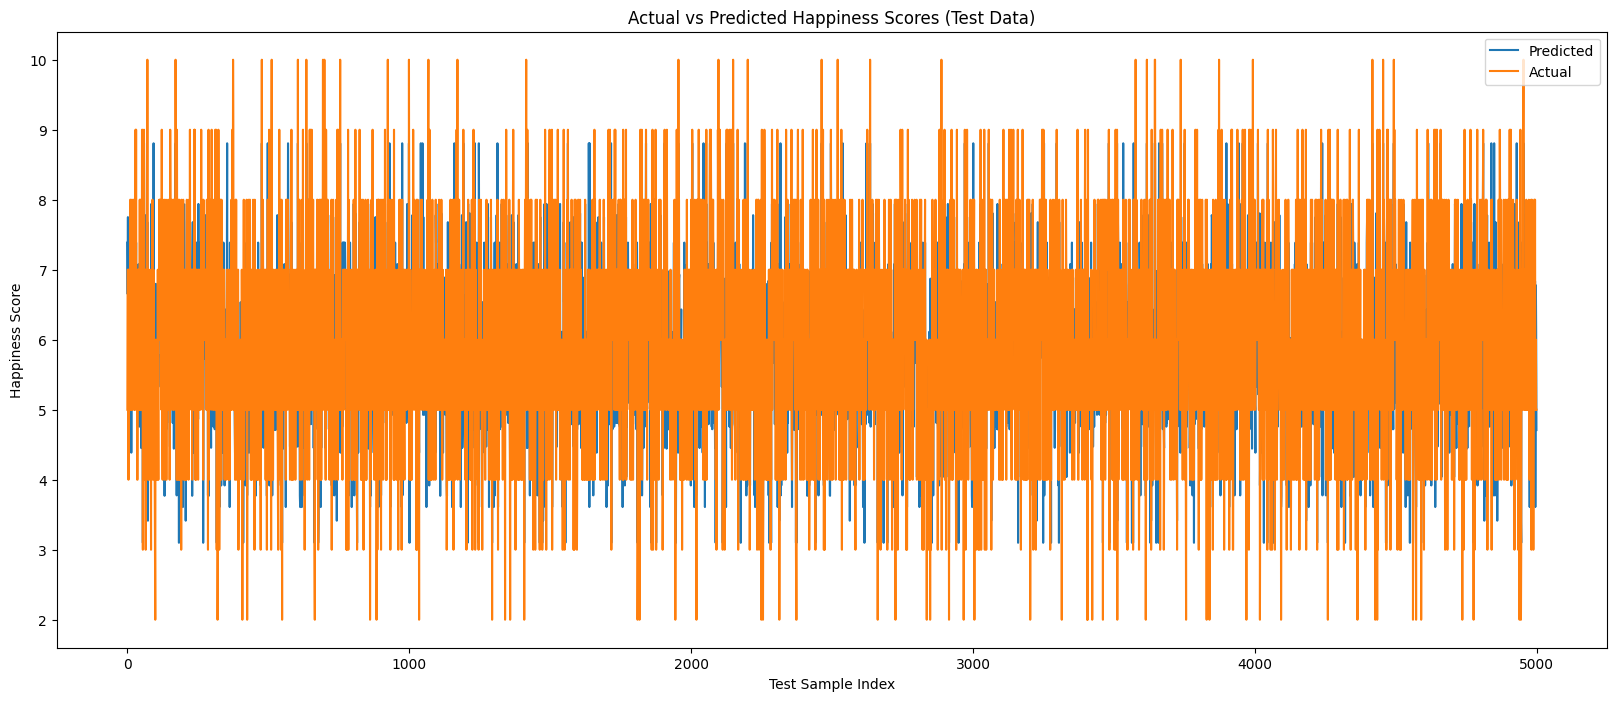

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(y_pred_test, label="Predicted")
plt.plot(np.array(y_test), label="Actual")
plt.legend()
plt.xlabel("Test Sample Index")
plt.ylabel("Happiness Score")
plt.title("Actual vs Predicted Happiness Scores (Test Data)")
plt.show()


In [ ]:
# ------------------- Random Forest Regressor -------------------
parameters = {
    'n_estimators':[58],
    'max_depth':[6],
    'max_features':[None],
    'max_samples':[0.85]
}
step2 = GridSearchCV(RandomForestRegressor(), param_grid=parameters, cv=10, n_jobs=-1)

pipe5 = Pipeline([
    ('step1', preprocessor),
    ('step2', step2)
])

pipe5.fit(X_train, y_train)

y_pred_train = pipe5.predict(X_train)
y_pred_test = pipe5.predict(X_test)

display(pipe5)

print("\033[1mTraining Data R² and Adjusted R²\033[0m")
print("R²:", r2_score(y_train, y_pred_train))
print("Adjusted R²:", 1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

print("\n\033[1mTesting Data R² and Adjusted R²\033[0m")
print("R²:", r2_score(y_test, y_pred_test))
print("Adjusted R²:", 1-(1-r2_score(y_test,y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

print("\nBest Params:", step2.best_params_)
print("CV Best Score:", step2.best_score_)

print("\n\033[1mPerformance Metrics\033[0m")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Sleep_Hours',
                                                   'Work_Hours',
                                                   'Physical_Activity_Hours',
                                                   'Social_Media_Usage'])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'max_depth': [6],
                                          'max_features': [None],
                                          'max_samples': [0.85],
                                          'n_estimators': [58]}))])

Training Data R² and Adjusted R²
R²: 0.6902463872777524
Adjusted R²: 0.6897499126668277

Testing Data R² and Adjusted R²
R²: 0.6721478046845288
Adjusted R²: 0.6700356101505858

Best Params: {'max_depth': 6, 'max_features': None, 'max_samples': 0.85, 'n_estimators': 58}
CV Best Score: 0.6784250941906669

Performance Metrics
MAE: 0.6747324841966619
MSE: 0.7085610362978103
RMSE: 0.8417606763788685


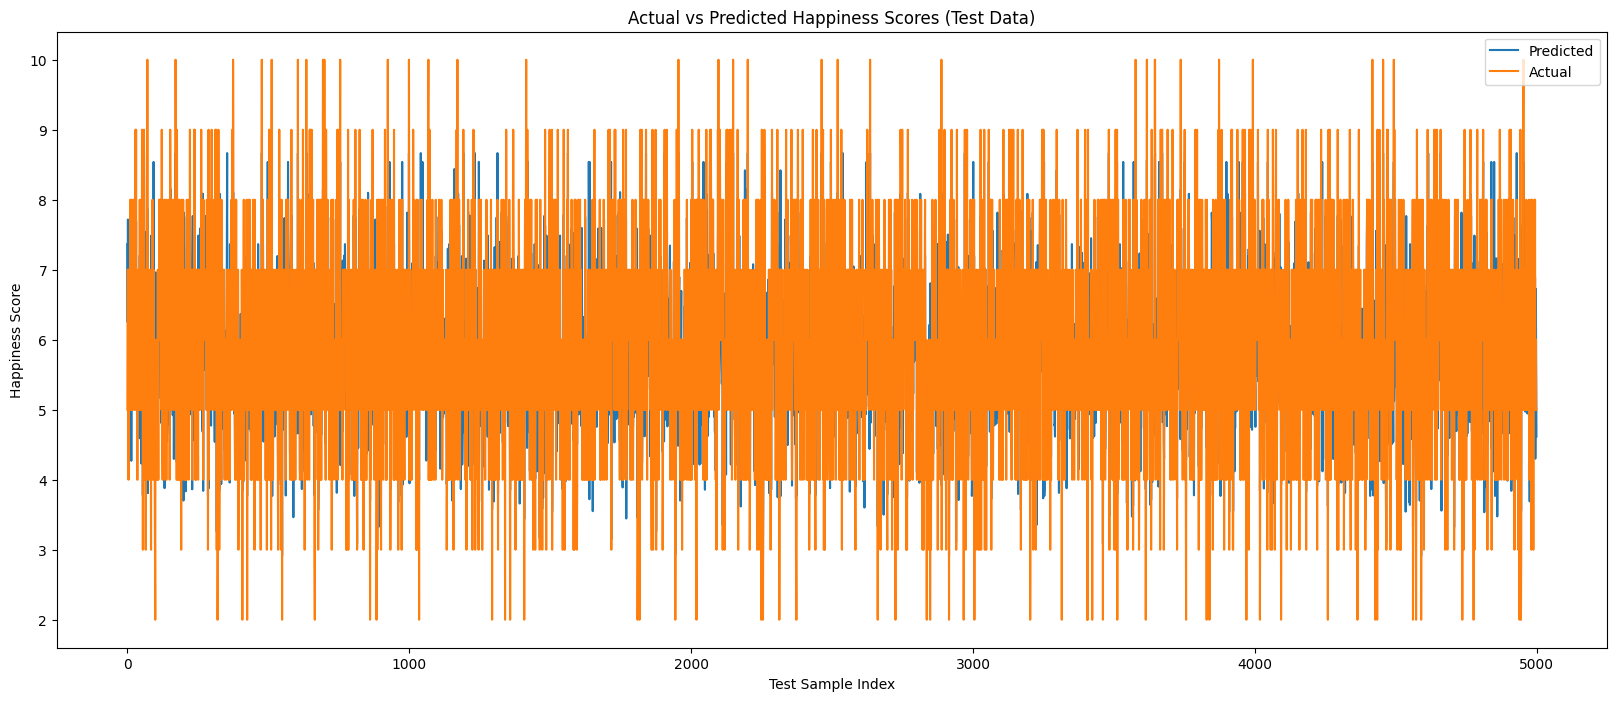

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(y_pred_test, label="Predicted")
plt.plot(np.array(y_test), label="Actual")
plt.legend()
plt.xlabel("Test Sample Index")
plt.ylabel("Happiness Score")
plt.title("Actual vs Predicted Happiness Scores (Test Data)")
plt.show()


In [25]:
# ------------------- XGBoost Regressor -------------------
parameters = {
    'n_estimators':[100,150],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.05,0.1],
    'subsample':[0.8,1.0]
}
step2 = GridSearchCV(XGBRegressor(random_state=42, objective='reg:squarederror'), param_grid=parameters, cv=5, n_jobs=-1)

pipe6 = Pipeline([
    ('step1', preprocessor),
    ('step2', step2)
])

pipe6.fit(X_train, y_train)

y_pred_train = pipe6.predict(X_train)
y_pred_test = pipe6.predict(X_test)

display(pipe6)

print("\033[1mTraining Data R² and Adjusted R²\033[0m")
print("R²:", r2_score(y_train, y_pred_train))
print("Adjusted R²:", 1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

print("\n\033[1mTesting Data R² and Adjusted R²\033[0m")
print("R²:", r2_score(y_test, y_pred_test))
print("Adjusted R²:", 1-(1-r2_score(y_test,y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

print("\nBest Params:", step2.best_params_)
print("CV Best Score:", step2.best_score_)

print("\n\033[1mPerformance Metrics\033[0m")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Sleep_Hours',
                                                   'Work_Hours',
                                                   'Physical_Activity_Hours',
                                                   'Social_Media_Usage'])])),
                ('step2',
                 GridSearchCV(cv=5,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=Non...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.01, 0.05, 0.1],
                                          'max_depth': [3, 5, 7],
                                          'n_estimators': [100, 150],
                                          'subsample': [0.8, 1.0]}))])

Training Data R² and Adjusted R²
R²: 0.9620605555786912
Adjusted R²: 0.9619997460509435

Testing Data R² and Adjusted R²
R²: 0.9612245121718128
Adjusted R²: 0.960974700291301

Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}
CV Best Score: 0.9602835365600612

Performance Metrics
MAE: 0.25049335584640503
MSE: 0.08380239702850295
RMSE: 0.28948643669177826


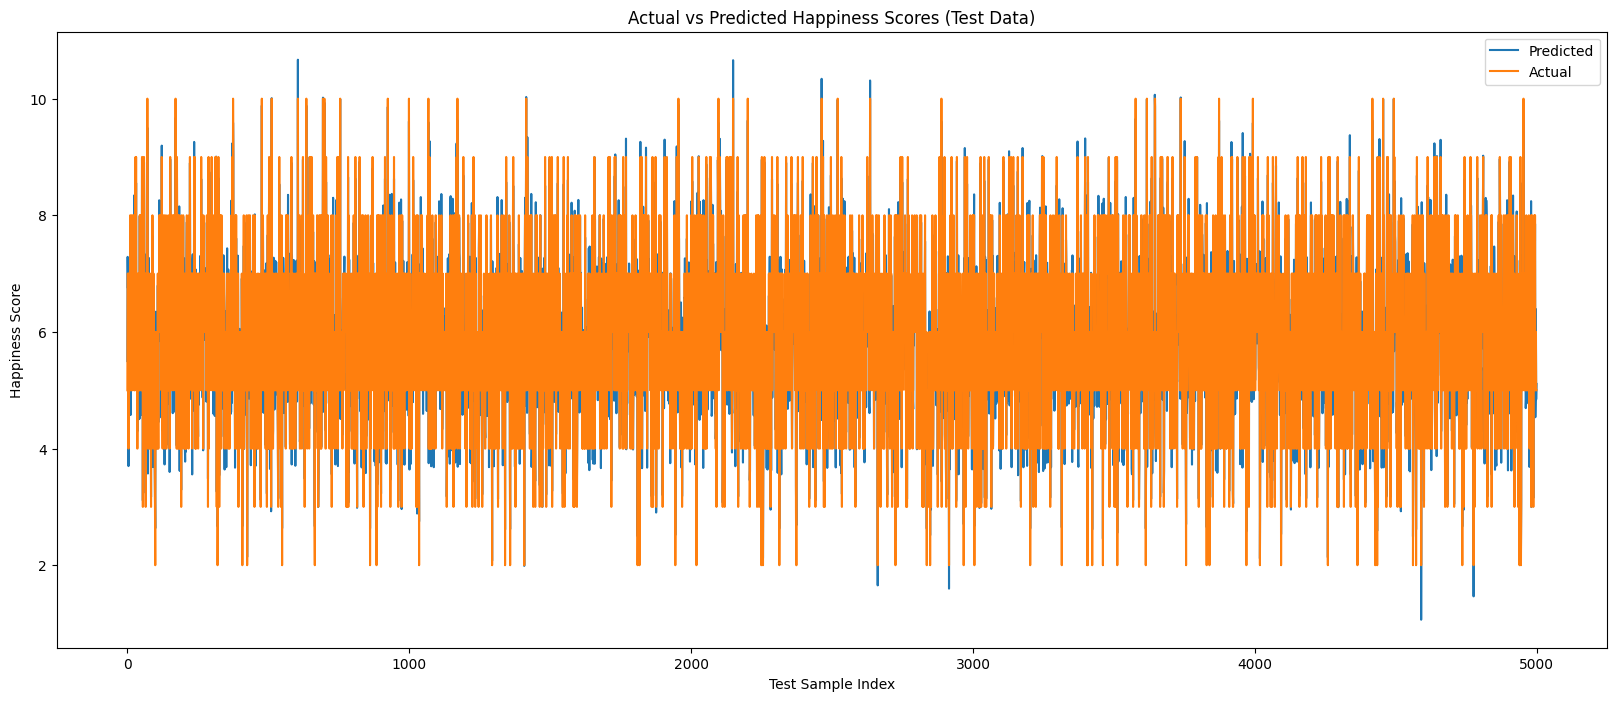

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(y_pred_test, label="Predicted")
plt.plot(np.array(y_test), label="Actual")
plt.legend()
plt.xlabel("Test Sample Index")
plt.ylabel("Happiness Score")
plt.title("Actual vs Predicted Happiness Scores (Test Data)")
plt.show()


**Results**

| Model                   | Train R² | Train Adj R² | Test R² | Test Adj R² | MAE    | MSE    | RMSE   | CV Best Score | Best Params                                                                         |
| ----------------------- | -------- | ------------ | ------- | ----------- | ------ | ------ | ------ | ------------- | ----------------------------------------------------------------------------------- |
| Linear Regression       | 0.8465   | 0.8463       | 0.8438  | 0.8428      | 0.4681 | 0.3375 | 0.5809 | 0.8455        | -                                                                                   |
| Ridge Regression        | 0.8465   | 0.8463       | 0.8438  | 0.8428      | 0.4681 | 0.3375 | 0.5809 | 0.8457        | {'alpha': 1}                                                                        |
| Lasso Regression        | 0.8464   | 0.8462       | 0.8439  | 0.8429      | 0.4679 | 0.3374 | 0.5808 | 0.8458        | {'alpha':0.001}                                                                     |
| Decision Tree Regressor | 0.6243   | 0.6237       | 0.5965  | 0.5939      | 0.7427 | 0.8720 | 0.9338 | 0.6061        | {'criterion':'squared\_error','max\_depth':6,'max\_features':1.0,'splitter':'best'} |
| Random Forest Regressor | 0.6910   | 0.6905       | 0.6729  | 0.6708      | 0.6739 | 0.7069 | 0.8408 | 0.6791        | {'max\_depth':6,'max\_features'\:None,'max\_samples':0.85,'n\_estimators':58}       |
| XGBoost Regressor       | 0.9621   | 0.9620       | 0.9612  | 0.96097     | 0.2505 | 0.0838 | 0.2895 | 0.9603        | {'learning\_rate':0.1,'max\_depth':3,'n\_estimators':150,'subsample':1.0}           |


In [27]:
features = [
    "Stress_Level",
    "Sleep_Hours",
    "Work_Hours",
    "Physical_Activity_Hours",
    "Social_Media_Usage",
    "Diet_Quality"
]


In [28]:

# Define thresholds
high_threshold = df_encoded['Happiness_Score'].quantile(0.75)
low_threshold = df_encoded['Happiness_Score'].quantile(0.25)

# Create peer groups
high_happy = df_encoded[df_encoded['Happiness_Score'] >= high_threshold]
low_happy = df_encoded[df_encoded['Happiness_Score'] <= low_threshold]

print("High Happiness Mean Profile:")
print(high_happy[features].mean())


High Happiness Mean Profile:
Stress_Level                1.696100
Sleep_Hours                 7.459572
Work_Hours                 49.140105
Physical_Activity_Hours     6.154702
Social_Media_Usage          3.249019
Diet_Quality                2.311318
dtype: float64


In [29]:
# Average lifestyle of high-happiness group
peer_profile = high_happy[features].mean()
def recommend_lifestyle_neatly(user_row, predicted_score):
    recommendations = []
    high_threshold = df_encoded['Happiness_Score'].quantile(0.75)
    if predicted_score < high_threshold:
        peer_profile = df_encoded[df_encoded['Happiness_Score'] >= high_threshold][features].mean()

        for f in features:
            user_val = user_row[f]
            peer_val = peer_profile[f]

            if f in ['Sleep_Hours', 'Physical_Activity_Hours', 'Diet_Quality'] and user_val < peer_val:
                diff = peer_val - user_val
                if f == 'Sleep_Hours':
                    recommendations.append(f"Try to sleep {diff:.1f} more hours per day.")
                elif f == 'Physical_Activity_Hours':
                    recommendations.append(f"Increase physical activity by {diff:.1f} hours per week.")
                elif f == 'Diet_Quality':
                    recommendations.append(f"Improve your diet quality to match healthy peers (current score: {user_val}, recommended: {peer_val:.1f}).")

            elif f in ['Work_Hours', 'Social_Media_Usage'] and user_val > peer_val:
                diff = user_val - peer_val
                if f == 'Work_Hours':
                    recommendations.append(f"Try to reduce work hours by {diff:.1f} hours per week to balance lifestyle.")
                elif f == 'Social_Media_Usage':
                    recommendations.append(f"Limit social media usage by {diff:.1f} hours per week.")
    else:
        recommendations.append("Your happiness score is already high. Keep maintaining your current lifestyle!")

    return recommendations


In [30]:
# Pick one test user
sample_user = X_test.iloc[[0]].copy()   # keep it as DataFrame
pred_score = pipe6.predict(sample_user)[0]

print("Predicted Happiness Score:", round(pred_score, 2))

print("\nRecommendations:")
# Call the correct function
recs = recommend_lifestyle_neatly(sample_user.iloc[0], pred_score)  # pass Series
for r in recs:
    print("-", r)


Predicted Happiness Score: 5.5

Recommendations:
- Try to reduce work hours by 19.9 hours per week to balance lifestyle.
- Increase physical activity by 1.2 hours per week.
- Limit social media usage by 1.3 hours per week.


In [31]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=3b2b9fde3b35d62891e0316295033bed3d757fc5ded791b364d3fe46de8ca07d
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [32]:
import lime
import lime.lime_tabular
import pandas as pd

# Pick the 90th test user
sample_user = X_test.iloc[89]

# Predict happiness score
pred_score = pipe6.predict(sample_user.to_frame().T)[0]
print(f"Predicted Happiness Score for 90th user: {pred_score:.2f}\n")

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    mode='regression'
)

# Generate explanation for this user
exp = explainer.explain_instance(
    data_row=sample_user,
    predict_fn=lambda x: pipe6.predict(pd.DataFrame(x, columns=X_train.columns)),
    num_features=10  # top 10 features
)

# Convert to DataFrame
lime_df = pd.DataFrame(exp.as_list(), columns=['Feature', 'Contribution'])

# Sort by absolute contribution
lime_df['AbsContribution'] = lime_df['Contribution'].abs()
lime_df = lime_df.sort_values(by='AbsContribution', ascending=False)

# Display the most influential features
print("Top Features Influencing the Prediction (90th user):\n")
display(lime_df[['Feature', 'Contribution']])


Predicted Happiness Score for 90th user: 7.65

Top Features Influencing the Prediction (90th user):



,Feature,Contribution
0,Mental_Health_Condition_Yes <= 0.00,0.995876
1,Stress_Level <= 1.00,0.915755
2,2.00 < Diet_Quality <= 3.00,0.911936
3,Smoking_Habit_Non-Smoker <= 0.00,-0.866452
4,0.00 < Alcohol_Consumption_Non-Drinker <= 1.00,0.864938
5,Sleep_Hours <= 5.50,-0.798390
6,42.00 < Work_Hours <= 55.00,0.593503
7,Smoking_Habit_Occasional Smoker > 0.00,0.589582
8,Alcohol_Consumption_Social Drinker <= 0.00,-0.558462
9,Smoking_Habit_Regular Smoker <= 0.00,-0.351792


In [33]:
import lime
import lime.lime_tabular
import pandas as pd

def lime_report(user_index, top_features=10):
    """
    Generate a LIME report for a specific user in X_test.

    Parameters:
    - user_index: index of the row in X_test
    - top_features: number of top features to show

    Returns:
    - DataFrame with Feature, Contribution, and Interpretation
    """
    sample_user = X_test.iloc[user_index]

    # Predict happiness score
    pred_score = pipe6.predict(sample_user.to_frame().T)[0]
    print(f"Predicted Happiness Score for user at index {user_index}: {pred_score:.2f}\n")

    # Initialize LIME explainer
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X_train.columns.tolist(),
        mode='regression'
    )

    # Generate explanation
    exp = explainer.explain_instance(
        data_row=sample_user,
        predict_fn=lambda x: pipe6.predict(pd.DataFrame(x, columns=X_train.columns)),
        num_features=top_features
    )

    # Convert LIME output to DataFrame
    lime_df = pd.DataFrame(exp.as_list(), columns=['Feature', 'Contribution'])

    # Sort by absolute contribution
    lime_df['AbsContribution'] = lime_df['Contribution'].abs()
    lime_df = lime_df.sort_values(by='AbsContribution', ascending=False).drop(columns='AbsContribution')

    # Generate dynamic interpretation
    def interpret(contrib):
        if contrib > 0:
            return "Feature is increasing the prediction"
        else:
            return "Feature is decreasing the prediction"

    lime_df['Interpretation'] = lime_df['Contribution'].apply(interpret)

    return lime_df

# Example usage: generate report for 90th user
report_90 = lime_report(89)
print("LIME Report for 90th User:\n")
display(report_90)


Predicted Happiness Score for user at index 89: 7.65

LIME Report for 90th User:



,Feature,Contribution,Interpretation
0,Mental_Health_Condition_Yes <= 0.00,1.014612,Feature is increasing the prediction
1,Stress_Level <= 1.00,0.934726,Feature is increasing the prediction
2,2.00 < Diet_Quality <= 3.00,0.922937,Feature is increasing the prediction
3,0.00 < Alcohol_Consumption_Non-Drinker <= 1.00,0.868541,Feature is increasing the prediction
4,Sleep_Hours <= 5.50,-0.814076,Feature is decreasing the prediction
5,Smoking_Habit_Non-Smoker <= 0.00,-0.793710,Feature is decreasing the prediction
6,Smoking_Habit_Occasional Smoker > 0.00,0.653010,Feature is increasing the prediction
7,Alcohol_Consumption_Social Drinker <= 0.00,-0.575461,Feature is decreasing the prediction
8,42.00 < Work_Hours <= 55.00,0.536849,Feature is increasing the prediction
9,Smoking_Habit_Regular Smoker <= 0.00,-0.383344,Feature is decreasing the prediction


In [ ]:
# ------------------- Imports -------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate, Add
from tensorflow.keras.callbacks import EarlyStopping

# ------------------- Data -------------------
# Assuming df_encoded is your preprocessed DataFrame with target 'Happiness_Score'
X = df_encoded.drop(columns=['Happiness_Score'])
y = df_encoded['Happiness_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: scale numeric features
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

X_train_dl = preprocessor.fit_transform(X_train)
X_test_dl = preprocessor.transform(X_test)

input_dim = X_train_dl.shape[1]

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# ------------------- 1. Basic MLP -------------------
model_mlp = Sequential([
    Dense(128, input_dim=input_dim, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model_mlp.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_mlp = model_mlp.fit(X_train_dl, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# ------------------- 2. Deep MLP -------------------
model_deep = Sequential([
    Dense(256, input_dim=input_dim, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model_deep.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_deep = model_deep.fit(X_train_dl, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# ------------------- 3. Wide & Deep Network -------------------
inputs = Input(shape=(input_dim,))
# Wide path
wide = Dense(64, activation='linear')(inputs)
# Deep path
deep = Dense(128, activation='relu')(inputs)
deep = Dense(64, activation='relu')(deep)
deep = Dense(32, activation='relu')(deep)
# Combine
concat = Concatenate()([wide, deep])
output = Dense(1, activation='linear')(concat)
model_wide_deep = Model(inputs=inputs, outputs=output)
model_wide_deep.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_wide_deep = model_wide_deep.fit(X_train_dl, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# ------------------- 4. Residual MLP -------------------
inputs = Input(shape=(input_dim,))
x = Dense(128, activation='relu')(inputs)
x_short = x
x = Dense(128, activation='relu')(x)
x = Add()([x, x_short])
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='linear')(x)
model_residual = Model(inputs=inputs, outputs=output)
model_residual.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_residual = model_residual.fit(X_train_dl, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# ------------------- Evaluation Function -------------------
def evaluate_model(model, X_train_dl, y_train, X_test_dl, y_test, name="Model"):
    y_pred_train = model.predict(X_train_dl).flatten()
    y_pred_test = model.predict(X_test_dl).flatten()

    r2_train = r2_score(y_train, y_pred_train)
    adj_r2_train = 1 - (1 - r2_train) * ((X_train_dl.shape[0] - 1) / (X_train_dl.shape[0] - X_train_dl.shape[1] - 1))

    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_test = 1 - (1 - r2_test) * ((X_test_dl.shape[0] - 1) / (X_test_dl.shape[0] - X_test_dl.shape[1] - 1))

    print(f"\n\033[1m{name} Metrics\033[0m")
    print("Training R²:", r2_train, " | Adjusted R²:", adj_r2_train)
    print("Testing R²:", r2_test, " | Adjusted R²:", adj_r2_test)
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

# ------------------- Evaluate All Models -------------------
evaluate_model(model_mlp, X_train_dl, y_train, X_test_dl, y_test, "Basic MLP")
evaluate_model(model_deep, X_train_dl, y_train, X_test_dl, y_test, "Deep MLP")
evaluate_model(model_wide_deep, X_train_dl, y_train, X_test_dl, y_test, "Wide & Deep MLP")
evaluate_model(model_residual, X_train_dl, y_train, X_test_dl, y_test, "Residual MLP")


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 5.7520 - mae: 1.5885 - val_loss: 0.4461 - val_mae: 0.5333
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5940 - mae: 0.6132 - val_loss: 0.3861 - val_mae: 0.4979
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5220 - mae: 0.5778 - val_loss: 0.5321 - val_mae: 0.5800
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4530 - mae: 0.5399 - val_loss: 0.3179 - val_mae: 0.4505
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4155 - mae: 0.5134 - val_loss: 0.3239 - val_mae: 0.4546
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3859 - mae: 0.4953 - val_loss: 0.3357 - val_mae: 0.4616
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3631 - mae: 0.4839 - val_loss: 0.3504 - val_mae: 0.4696
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3578 - mae: 0.4764 - val_loss: 0.4094 - val_mae: 0.5060
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

| Model           | Train R² | Test R² | Train Adj R² | Test Adj R² | MAE   | MSE   | RMSE  |
| --------------- | -------- | ------- | ------------ | ----------- | ----- | ----- | ----- |
| Basic MLP       | 0.918    | 0.900   | 0.918        | 0.899       | 0.376 | 0.216 | 0.465 |
| Deep MLP        | 0.969    | 0.943   | 0.969        | 0.943       | 0.277 | 0.123 | 0.351 |
| Wide & Deep MLP | 0.956    | 0.917   | 0.956        | 0.917       | 0.344 | 0.178 | 0.422 |
| Residual MLP    | 0.951    | 0.918   | 0.951        | 0.917       | 0.342 | 0.177 | 0.421 |


In [ ]:
# ------------------- Save Preprocessor -------------------
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')  # saves the preprocessing pipeline

# ------------------- Save Deep Learning Models -------------------
model_mlp.save('model_basic_mlp.h5')
model_deep.save('model_deep_mlp.h5')
model_wide_deep.save('model_wide_deep_mlp.h5')
model_residual.save('model_residual_mlp.h5')

print("All models and preprocessor saved successfully!")


All models and preprocessor saved successfully!


In [ ]:
print("Please enter your lifestyle habits to predict your Happiness Score and get recommendations.")

# 1. Define feature categories and acceptable inputs (re-define for self-contained cell)
numerical_features = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']
ordinal_features_info = {
    'Severity': {'Low': 1, 'Medium': 2, 'High': 3},
    'Stress_Level': {'Low': 1, 'Medium': 2, 'High': 3},
    'Diet_Quality': {'Unhealthy': 1, 'Average': 2, 'Healthy': 3}
}
nominal_binary_features_info = {
    'Gender': ['Female', 'Male', 'Non-binary', 'Prefer not to say'],
    'Occupation': ['Finance', 'Engineering', 'IT', 'Healthcare', 'Other', 'Education', 'Sales'],
    'Country': ['India', 'Canada', 'USA', 'Other', 'UK', 'Germany', 'Australia'],
    'Mental_Health_Condition': ['Yes', 'No'],
    'Consultation_History': ['Yes', 'No'],
    'Smoking_Habit': ['Heavy Smoker', 'Non-Smoker', 'Occasional Smoker', 'Regular Smoker'],
    'Alcohol_Consumption': ['Heavy Drinker', 'Non-Drinker', 'Social Drinker', 'Regular Drinker'],
    'Medication_Usage': ['Yes', 'No']
}

# Define features list for recommendations (from previous steps)
features = [
    "Stress_Level",
    "Sleep_Hours",
    "Work_Hours",
    "Physical_Activity_Hours",
    "Social_Media_Usage",
    "Diet_Quality"
]

# Define the high_threshold for Happiness_Score (from previous steps, using df_encoded)
high_threshold = df_encoded['Happiness_Score'].quantile(0.75)

# Define the recommendation function (from previous steps)
def recommend_lifestyle_neatly(user_row, predicted_score):
    recommendations = []
    # Note: df_encoded needs to be available in the global scope or passed as an argument
    # to ensure the high_threshold and peer_profile calculations are consistent.
    # For this self-contained block, high_threshold is already defined globally.

    if predicted_score < high_threshold:
        # Ensure df_encoded is accessible; if not, pass it as an argument or retrieve from global scope.
        # Re-calculating peer_profile for safety, assuming df_encoded is accessible.
        peer_profile = df_encoded[df_encoded['Happiness_Score'] >= high_threshold][features].mean()

        for f in features:
            # For ordinal features (Severity, Stress_Level, Diet_Quality), user_row already has mapped numerical values
            # For numerical features, user_row has original numerical values
            user_val = user_row[f]
            peer_val = peer_profile[f]

            if f in ['Sleep_Hours', 'Physical_Activity_Hours'] and user_val < peer_val:
                diff = peer_val - user_val
                if f == 'Sleep_Hours':
                    recommendations.append(f"Try to sleep {diff:.1f} more hours per day.")
                elif f == 'Physical_Activity_Hours':
                    recommendations.append(f"Increase physical activity by {diff:.1f} hours per week.")
            elif f == 'Diet_Quality' and user_val < peer_val:
                recommendations.append(f"Improve your diet quality to match healthy peers (current score: {user_val}, recommended: {peer_val:.1f}).")

            elif f in ['Work_Hours', 'Social_Media_Usage'] and user_val > peer_val:
                diff = user_val - peer_val
                if f == 'Work_Hours':
                    recommendations.append(f"Try to reduce work hours by {diff:.1f} hours per week to balance lifestyle.")
                elif f == 'Social_Media_Usage':
                    recommendations.append(f"Limit social media usage by {diff:.1f} hours per week.")
    else:
        recommendations.append("Your happiness score is already high. Keep maintaining your current lifestyle!")

    return recommendations

user_input_data = {}

# 2. Collect user inputs
for feature in numerical_features:
    while True:
        try:
            value = float(input(f"Enter your {feature.replace('_', ' ').lower()}: "))
            user_input_data[feature] = value
            break
        except ValueError:
            print("Invalid input. Please enter a numerical value.")

for feature, mapping in ordinal_features_info.items():
    options = list(mapping.keys())
    while True:
        value = input(f"Enter your {feature.replace('_', ' ').lower()} ({', '.join(options)}): ").strip().title()
        if value in options:
            user_input_data[feature] = value
            break
        else:
            print(f"Invalid input. Please choose from {', '.join(options)}.")

for feature, options in nominal_binary_features_info.items():
    while True:
        # Special handling for case consistency as per previous input gathering cell
        current_value = input(f"Enter your {feature.replace('_', ' ').lower()} ({', '.join(options)}): ").strip()
        if feature in ['Mental_Health_Condition', 'Consultation_History', 'Medication_Usage']:
            current_value = current_value.title()
        elif feature in ['Gender', 'Occupation', 'Country']:
            current_value = current_value.title()
        # For 'Smoking_Habit' and 'Alcohol_Consumption', the options themselves handle case,
        # so direct comparison should work if input is trimmed.

        if current_value in options:
            user_input_data[feature] = current_value
            break
        else:
            print(f"Invalid input. Please choose from {', '.join(options)}.")

# 3. Convert collected input to DataFrame
user_input_df_raw = pd.DataFrame([user_input_data])
print("\nUser Input Collected:")
display(user_input_df_raw)

# 4. Apply ordinal encoding to user input
for feature, mapping in ordinal_features_info.items():
    user_input_df_raw[feature] = user_input_df_raw[feature].map(mapping)

# 5. One-Hot Encoding for nominal and binary columns and align with X_train
# Identify columns that were one-hot encoded in training data
nominal_binary_cols = list(nominal_binary_features_info.keys())

# Apply one-hot encoding to the user's input
user_input_processed = pd.get_dummies(user_input_df_raw, columns=nominal_binary_cols, drop_first=True, dtype=int)

# Align columns with X_train (model's training data)
# Create a template DataFrame from X_train's columns, filled with zeros
aligned_user_input = pd.DataFrame(0, index=[0], columns=X_train.columns)

# Fill in the user's processed data into the aligned DataFrame
for col in user_input_processed.columns:
    if col in aligned_user_input.columns:
        aligned_user_input[col] = user_input_processed[col]

# Ensure the order of columns matches X_train
final_user_input_df = aligned_user_input[X_train.columns]

# 6. Predict Happiness Score
predicted_score = pipe6.predict(final_user_input_df)[0]

print(f"\nPredicted Happiness Score: {predicted_score:.2f}")

# 7. Generate and display recommendations
# Pass the preprocessed numerical values for features used in recommendation logic
# This assumes the features for recommendations are either numerical or ordinally encoded.
user_row_for_recs = final_user_input_df[features].iloc[0]
recs = recommend_lifestyle_neatly(user_row_for_recs, predicted_score)

print("\nPersonalized Lifestyle Recommendations:")
if recs:
    for r in recs:
        print(f"- {r}")
else:
    print("No specific recommendations at this time.")

Please enter your lifestyle habits to predict your Happiness Score and get recommendations.
Enter your age: 48
Enter your sleep hours: 6.8
Enter your work hours: 74
Enter your physical activity hours: 2
Enter your social media usage: 3.4
Enter your severity (Low, Medium, High): Low
Enter your stress level (Low, Medium, High): Low
Enter your diet quality (Unhealthy, Average, Healthy): Unhealthy
Enter your gender (Female, Male, Non-binary, Prefer not to say): Male
Enter your occupation (Finance, Engineering, IT, Healthcare, Other, Education, Sales): Engineering
Enter your country (India, Canada, USA, Other, UK, Germany, Australia): Other
Enter your mental health condition (Yes, No): No
Enter your consultation history (Yes, No): No
Enter your smoking habit (Heavy Smoker, Non-Smoker, Occasional Smoker, Regular Smoker): Heavy Smoker
Enter your alcohol consumption (Heavy Drinker, Non-Drinker, Social Drinker, Regular Drinker): Social Drinker
Enter your medication usage (Yes, No): No

User Inp

,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Severity,Stress_Level,Diet_Quality,Gender,Occupation,Country,Mental_Health_Condition,Consultation_History,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,48.0,6.8,74.0,2.0,3.4,Low,Low,Unhealthy,Male,Engineering,Other,No,No,Heavy Smoker,Social Drinker,No



Predicted Happiness Score: 3.68

Personalized Lifestyle Recommendations:
- Try to sleep 0.7 more hours per day.
- Try to reduce work hours by 24.9 hours per week to balance lifestyle.
- Increase physical activity by 4.2 hours per week.
- Limit social media usage by 0.2 hours per week.
- Improve your diet quality to match healthy peers (current score: 1.0, recommended: 2.3).


In [ ]:
# --- 1. CREATE DATAFRAME FROM YOUR SAMPLE ROWS ---

import pandas as pd

sample_data = [
    [48, "Male", "Engineering", "Other", "No", "Low", "No", "Low", 6.8, 74, 2, 3.4, "Unhealthy", "Heavy Smoker", "Social Drinker", "No"],
    [30, "Non-binary", "Engineering", "Australia", "No", "Medium", "No", "Low", 6.9, 57, 4, 5.4, "Average", "Regular Smoker", "Regular Drinker", "No"],
    [34, "Non-binary", "Healthcare", "Australia", "No", "High", "No", "Low", 5.1, 74, 4, 3.6, "Unhealthy", "Regular Smoker", "Social Drinker", "Yes"],
    [24, "Non-binary", "Engineering", "India", "Yes", "Medium", "Yes", "High", 7.1, 35, 4, 6.0, "Average", "Non-Smoker", "Non-Drinker", "Yes"],
    [53, "Male", "Other", "USA", "No", "Low", "No", "Low", 4.8, 62, 3, 5.7, "Unhealthy", "Occasional Smoker", "Regular Drinker", "Yes"],
    [43, "Male", "IT", "Canada", "No", "Medium", "No", "Low", 9.0, 66, 9, 5.5, "Unhealthy", "Occasional Smoker", "Non-Drinker", "No"],
    [64, "Male", "Other", "India", "No", "Low", "Yes", "Low", 4.0, 47, 1, 3.4, "Average", "Regular Smoker", "Non-Drinker", "Yes"],
    [49, "Prefer not to say", "Sales", "UK", "No", "Low", "No", "Low", 5.0, 66, 10, 3.4, "Healthy", "Regular Smoker", "Regular Drinker", "No"],
    [41, "Female", "Education", "Canada", "No", "High", "Yes", "Medium", 5.3, 42, 9, 5.7, "Average", "Heavy Smoker", "Heavy Drinker", "Yes"],
    [65, "Female", "Engineering", "Germany", "No", "High", "Yes", "Low", 6.6, 40, 4, 2.7, "Average", "Heavy Smoker", "Non-Drinker", "Yes"]
]

columns = [
    "Age","Gender","Occupation","Country","Mental_Health_Condition",
    "Severity","Consultation_History","Stress_Level","Sleep_Hours",
    "Work_Hours","Physical_Activity_Hours","Social_Media_Usage",
    "Diet_Quality","Smoking_Habit","Alcohol_Consumption","Medication_Usage"
]

user_df = pd.DataFrame(sample_data, columns=columns)

print("✅ Sample User Data Loaded")
display(user_df)

# --- 2. APPLY YOUR EXISTING PIPELINE TRANSFORMATIONS ---

# Ordinal encoding
ordinal_features_info = {
    'Severity': {'Low': 1, 'Medium': 2, 'High': 3},
    'Stress_Level': {'Low': 1, 'Medium': 2, 'High': 3},
    'Diet_Quality': {'Unhealthy': 1, 'Average': 2, 'Healthy': 3}
}

for f, mapping in ordinal_features_info.items():
    user_df[f] = user_df[f].map(mapping)

# Nominal/binary features to one-hot encode
nominal_binary_features = [
    'Gender','Occupation','Country','Mental_Health_Condition',
    'Consultation_History','Smoking_Habit','Alcohol_Consumption','Medication_Usage'
]

# One-hot encode
encoded_user_df = pd.get_dummies(user_df, columns=nominal_binary_features, drop_first=True, dtype=int)

# Align columns with X_train (model training columns)
aligned_df = pd.DataFrame(0, index=range(len(encoded_user_df)), columns=X_train.columns)
for col in encoded_user_df.columns:
    if col in aligned_df.columns:
        aligned_df[col] = encoded_user_df[col]

# Final input ready for prediction
final_input = aligned_df[X_train.columns]

# --- 3. PREDICT HAPPINESS SCORE FOR EACH ROW ---

predictions = pipe6.predict(final_input)

user_df["Predicted_Happiness_Score"] = predictions

print("\n✅ Predictions Completed")
display(user_df)

# --- 4. RECOMMENDATIONS FOR EACH USER ---

features = [
    "Stress_Level","Sleep_Hours","Work_Hours",
    "Physical_Activity_Hours","Social_Media_Usage","Diet_Quality"
]

print("\n✅ Lifestyle Recommendations:\n")

for idx in range(len(user_df)):
    row = final_input.iloc[idx][features]
    predicted = predictions[idx]
    recs = recommend_lifestyle_neatly(row, predicted)

    print(f"\n--- USER {idx+1} ---")
    print(f"Predicted Happiness Score: {predicted:.2f}")
    for r in recs:
        print("-", r)


✅ Sample User Data Loaded


,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
1,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
2,34,Non-binary,Healthcare,Australia,No,High,No,Low,5.1,74,4,3.6,Unhealthy,Regular Smoker,Social Drinker,Yes
3,24,Non-binary,Engineering,India,Yes,Medium,Yes,High,7.1,35,4,6.0,Average,Non-Smoker,Non-Drinker,Yes
4,53,Male,Other,USA,No,Low,No,Low,4.8,62,3,5.7,Unhealthy,Occasional Smoker,Regular Drinker,Yes
5,43,Male,IT,Canada,No,Medium,No,Low,9.0,66,9,5.5,Unhealthy,Occasional Smoker,Non-Drinker,No
6,64,Male,Other,India,No,Low,Yes,Low,4.0,47,1,3.4,Average,Regular Smoker,Non-Drinker,Yes
7,49,Prefer not to say,Sales,UK,No,Low,No,Low,5.0,66,10,3.4,Healthy,Regular Smoker,Regular Drinker,No
8,41,Female,Education,Canada,No,High,Yes,Medium,5.3,42,9,5.7,Average,Heavy Smoker,Heavy Drinker,Yes
9,65,Female,Engineering,Germany,No,High,Yes,Low,6.6,40,4,2.7,Average,Heavy Smoker,Non-Drinker,Yes



✅ Predictions Completed


,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage,Predicted_Happiness_Score
0,48,Male,Engineering,Other,No,1,No,1,6.8,74,2,3.4,1,Heavy Smoker,Social Drinker,No,4.557547
1,30,Non-binary,Engineering,Australia,No,2,No,1,6.9,57,4,5.4,2,Regular Smoker,Regular Drinker,No,6.508761
2,34,Non-binary,Healthcare,Australia,No,3,No,1,5.1,74,4,3.6,1,Regular Smoker,Social Drinker,Yes,5.120813
3,24,Non-binary,Engineering,India,Yes,2,Yes,3,7.1,35,4,6.0,2,Non-Smoker,Non-Drinker,Yes,6.627689
4,53,Male,Other,USA,No,1,No,1,4.8,62,3,5.7,1,Occasional Smoker,Regular Drinker,Yes,5.118462
5,43,Male,IT,Canada,No,2,No,1,9.0,66,9,5.5,1,Occasional Smoker,Non-Drinker,No,7.027693
6,64,Male,Other,India,No,1,Yes,1,4.0,47,1,3.4,2,Regular Smoker,Non-Drinker,Yes,6.593844
7,49,Prefer not to say,Sales,UK,No,1,No,1,5.0,66,10,3.4,3,Regular Smoker,Regular Drinker,No,6.523810
8,41,Female,Education,Canada,No,3,Yes,2,5.3,42,9,5.7,2,Heavy Smoker,Heavy Drinker,Yes,5.441342
9,65,Female,Engineering,Germany,No,3,Yes,1,6.6,40,4,2.7,2,Heavy Smoker,Non-Drinker,Yes,7.247313



✅ Lifestyle Recommendations:


--- USER 1 ---
Predicted Happiness Score: 4.56
- Try to sleep 0.7 more hours per day.
- Try to reduce work hours by 24.9 hours per week to balance lifestyle.
- Increase physical activity by 4.2 hours per week.
- Limit social media usage by 0.2 hours per week.
- Improve your diet quality to match healthy peers (current score: 1.0, recommended: 2.3).

--- USER 2 ---
Predicted Happiness Score: 6.51
- Try to sleep 0.6 more hours per day.
- Try to reduce work hours by 7.9 hours per week to balance lifestyle.
- Increase physical activity by 2.2 hours per week.
- Limit social media usage by 2.2 hours per week.
- Improve your diet quality to match healthy peers (current score: 2.0, recommended: 2.3).

--- USER 3 ---
Predicted Happiness Score: 5.12
- Try to sleep 2.4 more hours per day.
- Try to reduce work hours by 24.9 hours per week to balance lifestyle.
- Increase physical activity by 2.2 hours per week.
- Limit social media usage by 0.4 hours per week.
- Imp

In [ ]:
""""import gradio as gr
import pandas as pd
import numpy as np
import lime.lime_tabular
import matplotlib.pyplot as plt

# ✅ Extract model & preprocessor correctly
preprocessor = pipe6.named_steps['step1']
best_model = pipe6.named_steps['step2'].best_estimator_

# ✅ Transformed train data for LIME
X_train_t = preprocessor.transform(X_train)

# ✅ LIME Explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_t,
    feature_names=X_train.columns.tolist(),
    mode="regression"
)

# -----------------------------
# SAME ENCODERS FROM TRAINING
# -----------------------------
numerical_features = ['Age','Sleep_Hours','Work_Hours','Physical_Activity_Hours','Social_Media_Usage']

ordinal_features_info = {
    'Severity': {'Low':1,'Medium':2,'High':3},
    'Stress_Level': {'Low':1,'Medium':2,'High':3},
    'Diet_Quality': {'Unhealthy':1,'Average':2,'Healthy':3}
}

nominal_binary_features_info = {
    'Gender':['Female','Male','Non-binary','Prefer not to say'],
    'Occupation':['Finance','Engineering','IT','Healthcare','Other','Education','Sales'],
    'Country':['India','Canada','USA','Other','UK','Germany','Australia'],
    'Mental_Health_Condition':['Yes','No'],
    'Consultation_History':['Yes','No'],
    'Smoking_Habit':['Heavy Smoker','Non-Smoker','Occasional Smoker','Regular Smoker'],
    'Alcohol_Consumption':['Heavy Drinker','Non-Drinker','Social Drinker','Regular Drinker'],
    'Medication_Usage':['Yes','No']
}

features = [
    "Stress_Level","Sleep_Hours","Work_Hours",
    "Physical_Activity_Hours","Social_Media_Usage","Diet_Quality"
]

# -----------------------------
# RECOMMENDATION LOGIC
# -----------------------------
def recommend_lifestyle_neatly(user_row, predicted_score):
    recommendations = []
    peer_profile = df_encoded[df_encoded['Happiness_Score'] >= high_threshold][features].mean()

    if predicted_score < high_threshold:
        for f in features:
            u = user_row[f]
            p = peer_profile[f]

            if f in ['Sleep_Hours','Physical_Activity_Hours'] and u < p:
                diff = p - u
                if f == 'Sleep_Hours':
                    recommendations.append(f"Try to sleep {diff:.1f} more hours per day.")
                else:
                    recommendations.append(f"Increase physical activity by {diff:.1f} hours.")

            elif f == 'Diet_Quality' and u < p:
                recommendations.append(f"Improve diet quality (current: {u}, target: {p:.1f}).")

            elif f in ['Work_Hours','Social_Media_Usage'] and u > p:
                diff = u - p
                if f == 'Work_Hours':
                    recommendations.append(f"Reduce work hours by {diff:.1f} hours.")
                else:
                    recommendations.append(f"Limit social media by {diff:.1f} hours.")
    else:
        recommendations.append("Your happiness score is high — great job!")

    return recommendations

# -----------------------------
# PREPROCESS FIXED
# -----------------------------
def preprocess(df):
    df = df.copy()

    for col, mapping in ordinal_features_info.items():
        df[col] = df[col].map(mapping)

    nominal_cols = list(nominal_binary_features_info.keys())
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, dtype=int)

    aligned = pd.DataFrame(0, index=df.index, columns=X_train.columns)
    for c in df.columns:
        if c in aligned.columns:
            aligned[c] = df[c]

    return aligned

# -----------------------------
# ✅ ONLY LIME EXPLANATION
# -----------------------------
def predict_single(*inputs):

    single_dict = {}
    i = 0

    for col in numerical_features:
        single_dict[col] = inputs[i]; i += 1

    for col in ordinal_features_info.keys():
        single_dict[col] = inputs[i]; i += 1

    for col in nominal_binary_features_info.keys():
        single_dict[col] = inputs[i]; i += 1

    df = pd.DataFrame([single_dict])
    processed = preprocess(df)

    # ✅ Transform for model
    row_t = preprocessor.transform(processed)[0]
    score = best_model.predict([row_t])[0]

    # ✅ Generate LIME plot
    exp = lime_explainer.explain_instance(
        data_row=row_t,
        predict_fn=lambda x: best_model.predict(x),
        num_features=10
    )
    lime_fig = exp.as_pyplot_figure()
    lime_fig.savefig("lime_plot.png", bbox_inches="tight")
    plt.close(lime_fig)

    rec_row = processed[features].iloc[0]
    recs = recommend_lifestyle_neatly(rec_row, score)

    return (
        {"Predicted Happiness Score": float(score), "Recommendations": recs},
        "lime_plot.png"
    )

# -----------------------------
# CSV PREDICTION
# -----------------------------
def predict_csv(file):
    df = pd.read_csv(file.name)
    processed = preprocess(df)
    transformed = preprocessor.transform(processed)
    scores = best_model.predict(transformed)

    rec_list = []
    for i in range(len(df)):
        rec_row = processed[features].iloc[i]
        rec_list.append("\n".join(recommend_lifestyle_neatly(rec_row, scores[i])))

    result = df.copy()
    result["Predicted_Happiness_Score"] = scores
    result["Recommendations"] = rec_list
    return result

# -----------------------------
# ✅ GRADIO UI — NO SHAP, ONLY LIME
# -----------------------------
with gr.Blocks(theme="soft") as demo:
    gr.Markdown("<h1 style='text-align:center;'>🌟 Happiness Prediction + LIME Explanations</h1>")

    with gr.Tab("📄 CSV Upload"):
        csv_input = gr.File(label="Upload CSV")
        csv_output = gr.DataFrame(label="Results")
        gr.Button("Predict").click(predict_csv, inputs=csv_input, outputs=csv_output)

    with gr.Tab("✏️ Manual Input"):
        with gr.Row():
            with gr.Column():
                inputs = []
                for col in numerical_features:
                    inputs.append(gr.Number(label=col, value=0))
                for col, opts in ordinal_features_info.items():
                    inputs.append(gr.Dropdown(list(opts.keys()), label=col))
                for col, opts in nominal_binary_features_info.items():
                    inputs.append(gr.Dropdown(opts, label=col))

                out_json = gr.JSON(label="Prediction & Recommendations")
                predict_btn = gr.Button("Predict Happiness")

            with gr.Column():
                lime_img = gr.Image(label="LIME Explanation Plot")

        predict_btn.click(
            predict_single,
            inputs=inputs,
            outputs=[out_json, lime_img]
        )

demo.launch()
""""

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://85b6c527aad316613a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [34]:
!pip install gradio lime shap --quiet


In [57]:
# ============================================================
# ✅ IMPORTS
# ============================================================
import gradio as gr
import pandas as pd
import numpy as np
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# ✅ REQUIRED OBJECTS (Already trained earlier)
# These must exist in your notebook:
# pipe6, X_train, y_train, df_encoded, high_threshold
# ============================================================

preprocessor = pipe6.named_steps['step1']
best_model = pipe6.named_steps['step2'].best_estimator_

# ✅ Transform train data for LIME
X_train_t = preprocessor.transform(X_train)

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_t,
    feature_names=X_train.columns.tolist(),
    mode="regression"
)

# ============================================================
# ✅ SAME FEATURE DEFINITIONS USED IN TRAINING
# ============================================================

numerical_features = ['Age','Sleep_Hours','Work_Hours','Physical_Activity_Hours','Social_Media_Usage']

ordinal_features_info = {
    'Severity': {'Low':1,'Medium':2,'High':3},
    'Stress_Level': {'Low':1,'Medium':2,'High':3},
    'Diet_Quality': {'Unhealthy':1,'Average':2,'Healthy':3}
}

nominal_binary_features_info = {
    'Gender':['Female','Male','Non-binary','Prefer not to say'],
    'Occupation':['Finance','Engineering','IT','Healthcare','Other','Education','Sales'],
    'Country':['India','Canada','USA','Other','UK','Germany','Australia'],
    'Mental_Health_Condition':['Yes','No'],
    'Consultation_History':['Yes','No'],
    'Smoking_Habit':['Heavy Smoker','Non-Smoker','Occasional Smoker','Regular Smoker'],
    'Alcohol_Consumption':['Heavy Drinker','Non-Drinker','Social Drinker','Regular Drinker'],
    'Medication_Usage':['Yes','No']
}

features = [
    "Stress_Level","Sleep_Hours","Work_Hours",
    "Physical_Activity_Hours","Social_Media_Usage","Diet_Quality"
]

# ============================================================
# ✅ RECOMMENDATION LOGIC
# ============================================================
def recommend_lifestyle_neatly(user_row, predicted_score):
    recommendations = []
    peer_profile = df_encoded[df_encoded['Happiness_Score'] >= high_threshold][features].mean()

    if predicted_score < high_threshold:
        for f in features:
            u = user_row[f]
            p = peer_profile[f]

            if f in ['Sleep_Hours','Physical_Activity_Hours'] and u < p:
                diff = p - u
                if f == 'Sleep_Hours':
                    recommendations.append(f"Try to sleep {diff:.1f} more hours daily.")
                else:
                    recommendations.append(f"Increase physical activity by {diff:.1f} hours per week.")

            elif f == 'Diet_Quality' and u < p:
                recommendations.append(f"Improve diet quality (current {u}, ideal {p:.1f}).")

            elif f in ['Work_Hours','Social_Media_Usage'] and u > p:
                diff = u - p
                if f == 'Work_Hours':
                    recommendations.append(f"Reduce work hours by {diff:.1f} per week.")
                else:
                    recommendations.append(f"Reduce social media usage by {diff:.1f} hours per week.")
    else:
        recommendations.append("Your happiness score is high — great job!")

    return recommendations

# ============================================================
# ✅ PREPROCESS FUNCTION
# ============================================================
def preprocess(df):
    df = df.copy()

    for col, mapping in ordinal_features_info.items():
        df[col] = df[col].map(mapping)

    nominal_cols = list(nominal_binary_features_info.keys())
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, dtype=int)

    aligned = pd.DataFrame(0, index=df.index, columns=X_train.columns)
    for c in df.columns:
        if c in aligned.columns:
            aligned[c] = df[c]

    return aligned

# ============================================================
# ✅ PREDICT SINGLE INPUT + LIME PLOT
# ============================================================
def predict_single(*inputs):

    single_dict = {}
    i = 0

    # numeric
    for col in numerical_features:
        single_dict[col] = inputs[i]; i += 1

    # ordinal
    for col in ordinal_features_info.keys():
        single_dict[col] = inputs[i]; i += 1

    # nominal
    for col in nominal_binary_features_info.keys():
        single_dict[col] = inputs[i]; i += 1

    df = pd.DataFrame([single_dict])
    processed = preprocess(df)

    row_t = preprocessor.transform(processed)[0]
    score = best_model.predict([row_t])[0]

    # ✅ LIME PLOT
    exp = lime_explainer.explain_instance(
        data_row=row_t,
        predict_fn=lambda x: best_model.predict(x),
        num_features=10
    )

    lime_fig = exp.as_pyplot_figure()
    lime_fig.savefig("lime_plot.png", bbox_inches="tight")
    plt.close(lime_fig)

    rec_row = processed[features].iloc[0]
    recs = recommend_lifestyle_neatly(rec_row, score)

    return (
        {"Predicted Happiness Score": float(score), "Recommendations": recs},
        "lime_plot.png"
    )

# ============================================================
# ✅ CSV PREDICTION
# ============================================================
def predict_csv(file):
    df = pd.read_csv(file.name)
    processed = preprocess(df)
    transformed = preprocessor.transform(processed)
    scores = best_model.predict(transformed)

    rec_list = []
    for i in range(len(df)):
        rec_row = processed[features].iloc[i]
        rec_list.append("\n".join(recommend_lifestyle_neatly(rec_row, scores[i])))

    result = df.copy()
    result["Predicted_Happiness_Score"] = scores
    result["Recommendations"] = rec_list
    return result

# ============================================================
# ✅ DASHBOARD PLOTS
# ============================================================
# ============================================================
# ✅ DASHBOARD PLOTS (Improved sizing & layout)
# ============================================================
# ============================================================
# ✅ DASHBOARD PLOTS (Improved sizing, except heatmap)
# ============================================================
# ============================================================
# ✅ DASHBOARD PLOTS (Heatmap removed, neat sizing)
# ============================================================
def generate_dashboard():

    figs = []

    # Helper to save plots neatly
    def save_plot(fig, filename, width=8, height=6):
        fig.set_size_inches(width, height)
        fig.tight_layout()
        fig.savefig(filename, bbox_inches="tight")
        plt.close(fig)
        figs.append(filename)

    # 1) Feature Importance (dynamic width based on top features)
    importances = best_model.feature_importances_
    idx = np.argsort(importances)[-15:]
    n_features = len(idx)
    fig1, ax1 = plt.subplots(figsize=(max(8, n_features*0.5), 6))
    ax1.barh(range(n_features), importances[idx], color='skyblue')
    ax1.set_yticks(range(n_features))
    ax1.set_yticklabels(np.array(X_train.columns)[idx])
    ax1.set_title("Top Feature Importances", fontsize=14)
    save_plot(fig1, "feature_importance.png", width=max(8, n_features*0.5), height=6)

    # 2) Actual vs Predicted
    y_pred_train = best_model.predict(preprocessor.transform(X_train))
    fig2, ax2 = plt.subplots(figsize=(8,6))
    ax2.scatter(y_train, y_pred_train, color='darkgreen', alpha=0.6)
    ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    ax2.set_xlabel("Actual")
    ax2.set_ylabel("Predicted")
    ax2.set_title("Actual vs Predicted (Train)", fontsize=14)
    save_plot(fig2, "actual_vs_pred.png", width=8, height=6)

    # 3) Residual Plot
    residuals = y_train - y_pred_train
    fig3, ax3 = plt.subplots(figsize=(8,6))
    ax3.scatter(y_pred_train, residuals, alpha=0.6)
    ax3.axhline(0, color='r', linestyle='--')
    ax3.set_xlabel("Predicted")
    ax3.set_ylabel("Residuals")
    ax3.set_title("Residual Plot", fontsize=14)
    save_plot(fig3, "residual_plot.png", width=8, height=6)

    # 4) Prediction Distribution
    fig4, ax4 = plt.subplots(figsize=(8,6))
    sns.kdeplot(y_pred_train, fill=True, ax=ax4, color='purple')
    ax4.set_title("Prediction Distribution", fontsize=14)
    save_plot(fig4, "pred_dist.png", width=8, height=6)

    return figs




# ============================================================
# ✅ GRADIO UI
# ============================================================

with gr.Blocks(theme="soft") as demo:
    gr.Markdown("<h1 style='text-align:center;'>🌟Development and Deployment of AI for Mental Health and Life cycle Habits Recommendation System</h1>")

    # ---------------- CSV TAB ----------------
    with gr.Tab("📄 CSV Upload"):
        csv_input = gr.File(label="Upload CSV")
        csv_output = gr.DataFrame(label="Prediction Results")
        gr.Button("Predict").click(predict_csv, inputs=csv_input, outputs=csv_output)

    # ---------------- MANUAL TAB ----------------
    with gr.Tab("✏️ Manual Input"):
        with gr.Row():
            with gr.Column():
                inputs = []
                for col in numerical_features:
                    inputs.append(gr.Number(label=col, value=0))
                for col, opts in ordinal_features_info.items():
                    inputs.append(gr.Dropdown(list(opts.keys()), label=col))
                for col, opts in nominal_binary_features_info.items():
                    inputs.append(gr.Dropdown(opts, label=col))

                out_json = gr.JSON(label="Prediction & Recommendations")
                predict_btn = gr.Button("Predict Happiness")

            with gr.Column():
                lime_img = gr.Image(label="LIME Explanation Plot")

        predict_btn.click(
            predict_single,
            inputs=inputs,
            outputs=[out_json, lime_img]
        )

    # ---------------- DASHBOARD TAB ----------------
    with gr.Tab("📊 Dashboard Insights"):
        dash_btn = gr.Button("Generate Dashboard Plots")
        dash_gallery = gr.Gallery(columns=2, rows=3, height="auto")
        dash_btn.click(fn=generate_dashboard, inputs=None, outputs=dash_gallery)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ba9a2ad58183c300e5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
